In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import math
import matplotlib
import seaborn as sns

%matplotlib inline

#read data and store data in dataframe titled sg_used_car 
sg_used_car= pd.read_csv('sg used car price.txt', sep=',',index_col=0)
sg_used_car

,LISTING_URL,BRAND,PRICE,DEPRE_VALUE_PER_YEAR,REG_DATE,MILEAGE_KM,MANUFACTURED_YEAR,ROAD_TAX_PER_YEAR,TRANSMISSION,DEREG_VALUE_FROM_SCRAPE_DATE,SCRAPE_DATE,OMV,ARF,COE_FROM_SCRAPE_DATE,DAYS_OF_COE_LEFT,ENGINE_CAPACITY_CC,CURB_WEIGHT_KG,NO_OF_OWNERS,VEHICLE_TYPE
0,https://www.sgcarmart.com/used_cars/info.php?I...,Honda,58800.0,5880.0,24-Oct-2009,81000.0,2008,978.0,Auto,NaN,23/10/2019,28040.0,28040.0,NaN,0.0,1799,1219.0,1.0,Mid-Sized Sedan
1,https://www.sgcarmart.com/used_cars/info.php?I...,Honda,62800.0,6270.0,10-Nov-2009,106087.0,2009,1628.0,Auto,NaN,23/10/2019,33532.0,33532.0,NaN,0.0,2354,1680.0,3.0,MPV
2,https://www.sgcarmart.com/used_cars/info.php?I...,Austin,30000.0,16950.0,28-Sep-1972,NaN,1972,NaN,Manual,834.0,23/10/2019,NaN,NaN,4711.0,642.0,998,NaN,NaN,Others
3,https://www.sgcarmart.com/used_cars/info.php?I...,Audi,70800.0,16580.0,05-Dec-2011,140800.0,2011,2380.0,Auto,58899.0,23/10/2019,71379.0,71379.0,75889.0,761.0,2995,2250.0,3.0,SUV
4,https://www.sgcarmart.com/used_cars/info.php?I...,Toyota,65800.0,6850.0,26-Jun-2009,117000.0,2009,974.0,Auto,38024.0,23/10/2019,23465.0,23465.0,39563.0,3503.0,1797,1350.0,2.0,MPV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3982,https://www.sgcarmart.com/used_cars/info.php?I...,Toyota,104500.0,16550.0,02-Jun-2014,47638.0,2014,3100.0,Auto,78422.0,23/10/2019,45977.0,56368.0,84504.0,1679.0,3456,2030.0,2.0,MPV
3983,https://www.sgcarmart.com/used_cars/info.php?I...,Mercedes-Benz,115000.0,15260.0,11-Mar-2015,51500.0,2012,974.0,Auto,85824.0,23/10/2019,52051.0,65692.0,67901.0,1950.0,1796,1600.0,2.0,Sports Car
3984,https://www.sgcarmart.com/used_cars/info.php?I...,MINI,119800.0,13150.0,07-Jun-2017,16000.0,2017,1210.0,Auto,69888.0,23/10/2019,33570.0,38998.0,53300.0,2769.0,1998,1390.0,1.0,Sports Car
3985,https://www.sgcarmart.com/used_cars/info.php?I...,Nissan,81800.0,9900.0,05-Aug-2016,53339.0,2015,1786.0,Auto,60983.0,23/10/2019,26629.0,29281.0,57501.0,2462.0,2488,1510.0,1.0,Luxury Sedan


In [2]:
#print shape of the data 
sg_used_car.shape

(3987, 19)

In [3]:
#Summary of the sg used car price data 
sg_used_car.describe()

,PRICE,DEPRE_VALUE_PER_YEAR,MILEAGE_KM,ROAD_TAX_PER_YEAR,DEREG_VALUE_FROM_SCRAPE_DATE,OMV,ARF,COE_FROM_SCRAPE_DATE,DAYS_OF_COE_LEFT,ENGINE_CAPACITY_CC,CURB_WEIGHT_KG,NO_OF_OWNERS
count,3962.000000,3876.000000,3338.000000,3833.000000,3221.000000,3963.000000,3957.000000,3236.000000,3963.000000,3987.000000,3859.000000,3925.000000
mean,83201.312973,11407.925697,71870.671061,1161.109053,50947.490531,33822.094625,35356.628506,48309.075711,1943.007822,1886.066466,1432.756154,1.807643
std,73444.057027,9294.521774,44779.839099,897.455742,34418.521219,34394.898529,43257.325396,17093.072453,1002.474719,666.258555,257.023124,1.089259
min,1190.000000,1730.000000,3.000000,50.000000,34.000000,1800.000000,1316.000000,2989.000000,0.000000,647.000000,795.000000,1.000000
25%,46350.000000,7387.500000,37204.000000,684.000000,34674.000000,18131.500000,14570.000000,37502.000000,1465.000000,1498.000000,1249.000000,1.000000
50%,67800.000000,9230.000000,65000.000000,750.000000,45855.000000,25050.000000,22642.000000,49998.000000,2070.000000,1598.000000,1395.000000,1.000000
75%,93800.000000,12690.000000,105000.000000,1210.000000,59055.000000,36973.000000,39195.000000,57498.000000,2679.000000,1997.000000,1602.500000,2.000000
max,938000.000000,131070.000000,330000.000000,11550.000000,423396.000000,487275.000000,536003.000000,97889.000000,3563.000000,6749.000000,2745.000000,6.000000


In [4]:
sg_used_car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3987 entries, 0 to 3986
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   LISTING_URL                   3987 non-null   object 
 1   BRAND                         3987 non-null   object 
 2   PRICE                         3962 non-null   float64
 3   DEPRE_VALUE_PER_YEAR          3876 non-null   float64
 4   REG_DATE                      3987 non-null   object 
 5   MILEAGE_KM                    3338 non-null   float64
 6   MANUFACTURED_YEAR             3987 non-null   object 
 7   ROAD_TAX_PER_YEAR             3833 non-null   float64
 8   TRANSMISSION                  3987 non-null   object 
 9   DEREG_VALUE_FROM_SCRAPE_DATE  3221 non-null   float64
 10  SCRAPE_DATE                   3987 non-null   object 
 11  OMV                           3963 non-null   float64
 12  ARF                           3957 non-null   float64
 13  COE

# Part 1: DataFrame Cleaning, analysis, conversion

# 1.1: DataFrame analysis 

In [5]:
#Columns name 
sg_used_car.columns

Index(['LISTING_URL', 'BRAND', 'PRICE', 'DEPRE_VALUE_PER_YEAR', 'REG_DATE',
       'MILEAGE_KM', 'MANUFACTURED_YEAR', 'ROAD_TAX_PER_YEAR', 'TRANSMISSION',
       'DEREG_VALUE_FROM_SCRAPE_DATE', 'SCRAPE_DATE', 'OMV', 'ARF',
       'COE_FROM_SCRAPE_DATE', 'DAYS_OF_COE_LEFT', 'ENGINE_CAPACITY_CC',
       'CURB_WEIGHT_KG', 'NO_OF_OWNERS', 'VEHICLE_TYPE'],
      dtype='object')

Dropping unnecessary columns and removing impermissible value based on Domain Knowledge

In [6]:
#Dropping two columns Listing URL and Scrape date which is not relevant as one of the features 
#NOTE: scrape date will be used to caclulate to calculate the age of car
sg_clean=sg_used_car.drop(['LISTING_URL', 'SCRAPE_DATE','NO_OF_OWNERS'],axis=1)
sg_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3987 entries, 0 to 3986
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   BRAND                         3987 non-null   object 
 1   PRICE                         3962 non-null   float64
 2   DEPRE_VALUE_PER_YEAR          3876 non-null   float64
 3   REG_DATE                      3987 non-null   object 
 4   MILEAGE_KM                    3338 non-null   float64
 5   MANUFACTURED_YEAR             3987 non-null   object 
 6   ROAD_TAX_PER_YEAR             3833 non-null   float64
 7   TRANSMISSION                  3987 non-null   object 
 8   DEREG_VALUE_FROM_SCRAPE_DATE  3221 non-null   float64
 9   OMV                           3963 non-null   float64
 10  ARF                           3957 non-null   float64
 11  COE_FROM_SCRAPE_DATE          3236 non-null   float64
 12  DAYS_OF_COE_LEFT              3963 non-null   float64
 13  ENG

In [7]:
#Find out which features has NA values 
sg_clean.isna().sum()

BRAND                             0
PRICE                            25
DEPRE_VALUE_PER_YEAR            111
REG_DATE                          0
MILEAGE_KM                      649
MANUFACTURED_YEAR                 0
ROAD_TAX_PER_YEAR               154
TRANSMISSION                      0
DEREG_VALUE_FROM_SCRAPE_DATE    766
OMV                              24
ARF                              30
COE_FROM_SCRAPE_DATE            751
DAYS_OF_COE_LEFT                 24
ENGINE_CAPACITY_CC                0
CURB_WEIGHT_KG                  128
VEHICLE_TYPE                      0
dtype: int64

In [8]:
#Count the number of NA value in an entire DataFrame 
sg_clean.isna().sum().sum()
#There are NA values in this dataset
#There is a need to drop these NA values to prevent problems for the Machine Leanring model later on

2662

In [9]:
#drop NA values 
sg_clean.dropna(inplace=True)
sg_clean.info() 
#We have now 16 features in our columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2593 entries, 3 to 3985
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   BRAND                         2593 non-null   object 
 1   PRICE                         2593 non-null   float64
 2   DEPRE_VALUE_PER_YEAR          2593 non-null   float64
 3   REG_DATE                      2593 non-null   object 
 4   MILEAGE_KM                    2593 non-null   float64
 5   MANUFACTURED_YEAR             2593 non-null   object 
 6   ROAD_TAX_PER_YEAR             2593 non-null   float64
 7   TRANSMISSION                  2593 non-null   object 
 8   DEREG_VALUE_FROM_SCRAPE_DATE  2593 non-null   float64
 9   OMV                           2593 non-null   float64
 10  ARF                           2593 non-null   float64
 11  COE_FROM_SCRAPE_DATE          2593 non-null   float64
 12  DAYS_OF_COE_LEFT              2593 non-null   float64
 13  ENG

In [10]:
#Renaming Brands of Cars 
sg_clean.loc[sg_clean['BRAND'] == 'Aston','BRAND'] = 'Aston Martin'
sg_clean.loc[sg_clean['BRAND'] == 'Land','BRAND'] = 'Land Rover'
sg_clean.loc[sg_clean['BRAND'] == 'Alfa', 'BRAND'] = 'Alfa Romeo'

sg_clean 

,BRAND,PRICE,DEPRE_VALUE_PER_YEAR,REG_DATE,MILEAGE_KM,MANUFACTURED_YEAR,ROAD_TAX_PER_YEAR,TRANSMISSION,DEREG_VALUE_FROM_SCRAPE_DATE,OMV,ARF,COE_FROM_SCRAPE_DATE,DAYS_OF_COE_LEFT,ENGINE_CAPACITY_CC,CURB_WEIGHT_KG,VEHICLE_TYPE
3,Audi,70800.0,16580.0,05-Dec-2011,140800.0,2011,2380.0,Auto,58899.0,71379.0,71379.0,75889.0,761.0,2995,2250.0,SUV
4,Toyota,65800.0,6850.0,26-Jun-2009,117000.0,2009,974.0,Auto,38024.0,23465.0,23465.0,39563.0,3503.0,1797,1350.0,MPV
5,Mercedes-Benz,45000.0,18550.0,21-Sep-2010,126000.0,2010,974.0,Auto,31818.0,56154.0,56154.0,41006.0,8.0,1796,1650.0,Luxury Sedan
7,BMW,70800.0,12680.0,23-Apr-2014,41000.0,2013,742.0,Auto,54685.0,32459.0,27443.0,78810.0,1610.0,1598,1405.0,Luxury Sedan
9,Audi,89500.0,11910.0,25-Nov-2015,57784.0,2015,624.0,Auto,62640.0,29913.0,33879.0,61103.0,2221.0,1395,1480.0,SUV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3981,Mercedes-Benz,103800.0,13470.0,18-Jul-2016,19000.0,2016,740.0,Auto,55704.0,27886.0,26041.0,53694.0,2434.0,1595,1430.0,Luxury Sedan
3982,Toyota,104500.0,16550.0,02-Jun-2014,47638.0,2014,3100.0,Auto,78422.0,45977.0,56368.0,84504.0,1679.0,3456,2030.0,MPV
3983,Mercedes-Benz,115000.0,15260.0,11-Mar-2015,51500.0,2012,974.0,Auto,85824.0,52051.0,65692.0,67901.0,1950.0,1796,1600.0,Sports Car
3984,MINI,119800.0,13150.0,07-Jun-2017,16000.0,2017,1210.0,Auto,69888.0,33570.0,38998.0,53300.0,2769.0,1998,1390.0,Sports Car


In [11]:
#Date time conversion 

#change registration date to datetime and manufactured year to int 

sg_clean['MANUFACTURED_YEAR'] = sg_clean['MANUFACTURED_YEAR'].astype(int)
sg_clean['REG_DATE'] = pd.to_datetime(sg_clean['REG_DATE'])
sg_clean

,BRAND,PRICE,DEPRE_VALUE_PER_YEAR,REG_DATE,MILEAGE_KM,MANUFACTURED_YEAR,ROAD_TAX_PER_YEAR,TRANSMISSION,DEREG_VALUE_FROM_SCRAPE_DATE,OMV,ARF,COE_FROM_SCRAPE_DATE,DAYS_OF_COE_LEFT,ENGINE_CAPACITY_CC,CURB_WEIGHT_KG,VEHICLE_TYPE
3,Audi,70800.0,16580.0,2011-12-05,140800.0,2011,2380.0,Auto,58899.0,71379.0,71379.0,75889.0,761.0,2995,2250.0,SUV
4,Toyota,65800.0,6850.0,2009-06-26,117000.0,2009,974.0,Auto,38024.0,23465.0,23465.0,39563.0,3503.0,1797,1350.0,MPV
5,Mercedes-Benz,45000.0,18550.0,2010-09-21,126000.0,2010,974.0,Auto,31818.0,56154.0,56154.0,41006.0,8.0,1796,1650.0,Luxury Sedan
7,BMW,70800.0,12680.0,2014-04-23,41000.0,2013,742.0,Auto,54685.0,32459.0,27443.0,78810.0,1610.0,1598,1405.0,Luxury Sedan
9,Audi,89500.0,11910.0,2015-11-25,57784.0,2015,624.0,Auto,62640.0,29913.0,33879.0,61103.0,2221.0,1395,1480.0,SUV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3981,Mercedes-Benz,103800.0,13470.0,2016-07-18,19000.0,2016,740.0,Auto,55704.0,27886.0,26041.0,53694.0,2434.0,1595,1430.0,Luxury Sedan
3982,Toyota,104500.0,16550.0,2014-06-02,47638.0,2014,3100.0,Auto,78422.0,45977.0,56368.0,84504.0,1679.0,3456,2030.0,MPV
3983,Mercedes-Benz,115000.0,15260.0,2015-03-11,51500.0,2012,974.0,Auto,85824.0,52051.0,65692.0,67901.0,1950.0,1796,1600.0,Sports Car
3984,MINI,119800.0,13150.0,2017-06-07,16000.0,2017,1210.0,Auto,69888.0,33570.0,38998.0,53300.0,2769.0,1998,1390.0,Sports Car


In [12]:
#changing the Scrape date to just a year 
sg_used_car['SCRAPE_DATE']= pd.to_datetime(sg_used_car['SCRAPE_DATE']).dt.year

#checking dtype 
sg_used_car['SCRAPE_DATE']

0       2019
1       2019
2       2019
3       2019
4       2019
        ... 
3982    2019
3983    2019
3984    2019
3985    2019
3986    2019
Name: SCRAPE_DATE, Length: 3987, dtype: int64

## 1.2 Adding a Car Age column 

More intuitive to understand and know how old a car is rather than just its manufatured date

In [13]:
sg_clean['CAR_AGE'] = sg_used_car['SCRAPE_DATE'] - sg_clean['MANUFACTURED_YEAR'] # Obtaining values for age of car
sg_clean['CAR_AGE'].astype(int)

sg_clean

,BRAND,PRICE,DEPRE_VALUE_PER_YEAR,REG_DATE,MILEAGE_KM,MANUFACTURED_YEAR,ROAD_TAX_PER_YEAR,TRANSMISSION,DEREG_VALUE_FROM_SCRAPE_DATE,OMV,ARF,COE_FROM_SCRAPE_DATE,DAYS_OF_COE_LEFT,ENGINE_CAPACITY_CC,CURB_WEIGHT_KG,VEHICLE_TYPE,CAR_AGE
3,Audi,70800.0,16580.0,2011-12-05,140800.0,2011,2380.0,Auto,58899.0,71379.0,71379.0,75889.0,761.0,2995,2250.0,SUV,8.0
4,Toyota,65800.0,6850.0,2009-06-26,117000.0,2009,974.0,Auto,38024.0,23465.0,23465.0,39563.0,3503.0,1797,1350.0,MPV,10.0
5,Mercedes-Benz,45000.0,18550.0,2010-09-21,126000.0,2010,974.0,Auto,31818.0,56154.0,56154.0,41006.0,8.0,1796,1650.0,Luxury Sedan,9.0
7,BMW,70800.0,12680.0,2014-04-23,41000.0,2013,742.0,Auto,54685.0,32459.0,27443.0,78810.0,1610.0,1598,1405.0,Luxury Sedan,6.0
9,Audi,89500.0,11910.0,2015-11-25,57784.0,2015,624.0,Auto,62640.0,29913.0,33879.0,61103.0,2221.0,1395,1480.0,SUV,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3981,Mercedes-Benz,103800.0,13470.0,2016-07-18,19000.0,2016,740.0,Auto,55704.0,27886.0,26041.0,53694.0,2434.0,1595,1430.0,Luxury Sedan,3.0
3982,Toyota,104500.0,16550.0,2014-06-02,47638.0,2014,3100.0,Auto,78422.0,45977.0,56368.0,84504.0,1679.0,3456,2030.0,MPV,5.0
3983,Mercedes-Benz,115000.0,15260.0,2015-03-11,51500.0,2012,974.0,Auto,85824.0,52051.0,65692.0,67901.0,1950.0,1796,1600.0,Sports Car,7.0
3984,MINI,119800.0,13150.0,2017-06-07,16000.0,2017,1210.0,Auto,69888.0,33570.0,38998.0,53300.0,2769.0,1998,1390.0,Sports Car,2.0


In [14]:
#Rearranging columns

sg_clean2=sg_clean[['BRAND', 'PRICE', 'DEPRE_VALUE_PER_YEAR', 'MILEAGE_KM', 'COE_FROM_SCRAPE_DATE', 'DAYS_OF_COE_LEFT', 
                    'REG_DATE', 'MANUFACTURED_YEAR', 'CAR_AGE', 'DEREG_VALUE_FROM_SCRAPE_DATE', 'OMV', 'ARF', 
                    'ENGINE_CAPACITY_CC', 'ROAD_TAX_PER_YEAR', 'CURB_WEIGHT_KG', 'VEHICLE_TYPE', 'TRANSMISSION']]
sg_clean2

,BRAND,PRICE,DEPRE_VALUE_PER_YEAR,MILEAGE_KM,COE_FROM_SCRAPE_DATE,DAYS_OF_COE_LEFT,REG_DATE,MANUFACTURED_YEAR,CAR_AGE,DEREG_VALUE_FROM_SCRAPE_DATE,OMV,ARF,ENGINE_CAPACITY_CC,ROAD_TAX_PER_YEAR,CURB_WEIGHT_KG,VEHICLE_TYPE,TRANSMISSION
3,Audi,70800.0,16580.0,140800.0,75889.0,761.0,2011-12-05,2011,8.0,58899.0,71379.0,71379.0,2995,2380.0,2250.0,SUV,Auto
4,Toyota,65800.0,6850.0,117000.0,39563.0,3503.0,2009-06-26,2009,10.0,38024.0,23465.0,23465.0,1797,974.0,1350.0,MPV,Auto
5,Mercedes-Benz,45000.0,18550.0,126000.0,41006.0,8.0,2010-09-21,2010,9.0,31818.0,56154.0,56154.0,1796,974.0,1650.0,Luxury Sedan,Auto
7,BMW,70800.0,12680.0,41000.0,78810.0,1610.0,2014-04-23,2013,6.0,54685.0,32459.0,27443.0,1598,742.0,1405.0,Luxury Sedan,Auto
9,Audi,89500.0,11910.0,57784.0,61103.0,2221.0,2015-11-25,2015,4.0,62640.0,29913.0,33879.0,1395,624.0,1480.0,SUV,Auto
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3981,Mercedes-Benz,103800.0,13470.0,19000.0,53694.0,2434.0,2016-07-18,2016,3.0,55704.0,27886.0,26041.0,1595,740.0,1430.0,Luxury Sedan,Auto
3982,Toyota,104500.0,16550.0,47638.0,84504.0,1679.0,2014-06-02,2014,5.0,78422.0,45977.0,56368.0,3456,3100.0,2030.0,MPV,Auto
3983,Mercedes-Benz,115000.0,15260.0,51500.0,67901.0,1950.0,2015-03-11,2012,7.0,85824.0,52051.0,65692.0,1796,974.0,1600.0,Sports Car,Auto
3984,MINI,119800.0,13150.0,16000.0,53300.0,2769.0,2017-06-07,2017,2.0,69888.0,33570.0,38998.0,1998,1210.0,1390.0,Sports Car,Auto


# Part 2: Categorizing of Data

In [15]:
#Transmission: Auto and Manual, can do 1-hot encoding
#One hot encoding is a process by which categorical variables are converted into a form that could be provided 
#to ML algorithms to do a better job in prediction.

sg_clean2['TRANSMISSION'].value_counts()

Auto      2555
Manual      38
Name: TRANSMISSION, dtype: int64

In [16]:
#Convert Auto -> 0, Manual -> 1 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

le = LabelEncoder()
sg_clean2['TRANSMISSION'] = le.fit_transform(sg_clean2['TRANSMISSION'])
print(le.classes_)
sg_clean2.info()
sg_clean2.sample(10)

['Auto' 'Manual']
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2593 entries, 3 to 3985
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   BRAND                         2593 non-null   object        
 1   PRICE                         2593 non-null   float64       
 2   DEPRE_VALUE_PER_YEAR          2593 non-null   float64       
 3   MILEAGE_KM                    2593 non-null   float64       
 4   COE_FROM_SCRAPE_DATE          2593 non-null   float64       
 5   DAYS_OF_COE_LEFT              2593 non-null   float64       
 6   REG_DATE                      2593 non-null   datetime64[ns]
 7   MANUFACTURED_YEAR             2593 non-null   int64         
 8   CAR_AGE                       2593 non-null   float64       
 9   DEREG_VALUE_FROM_SCRAPE_DATE  2593 non-null   float64       
 10  OMV                           2593 non-null   float64       
 11  ARF         

,BRAND,PRICE,DEPRE_VALUE_PER_YEAR,MILEAGE_KM,COE_FROM_SCRAPE_DATE,DAYS_OF_COE_LEFT,REG_DATE,MANUFACTURED_YEAR,CAR_AGE,DEREG_VALUE_FROM_SCRAPE_DATE,OMV,ARF,ENGINE_CAPACITY_CC,ROAD_TAX_PER_YEAR,CURB_WEIGHT_KG,VEHICLE_TYPE,TRANSMISSION
785,MINI,53000.0,12150.0,59000.0,87109.0,1189.0,2013-02-07,2012,7.0,45568.0,25972.0,25972.0,1598,742.0,1295.0,Hatchback,0
2464,Audi,91000.0,11580.0,50700.0,57010.0,2430.0,2016-07-04,2016,3.0,58325.0,32034.0,26848.0,1395,624.0,1450.0,Luxury Sedan,0
3860,Honda,63800.0,8670.0,38000.0,53000.0,2469.0,2016-08-02,2016,3.0,43481.0,20054.0,10076.0,1496,682.0,1190.0,SUV,0
3808,Mercedes-Benz,243800.0,23530.0,52000.0,57414.0,3011.0,2018-01-25,2017,2.0,121602.0,70501.0,98902.0,2996,2382.0,1690.0,Luxury Sedan,0
1467,Ford,185000.0,21980.0,11553.0,57002.0,2196.0,2016-09-09,2016,3.0,89862.0,53061.0,67510.0,4951,5438.0,1659.0,Sports Car,0
456,Ford,76800.0,10550.0,44000.0,60789.0,2101.0,2015-08-19,2015,4.0,58416.0,27627.0,30678.0,1999,1212.0,1712.0,Hatchback,0
3345,Hyundai,29800.0,6040.0,111328.0,14743.0,1494.0,2009-09-28,2009,10.0,14549.0,14708.0,14708.0,1591,738.0,1360.0,Stationwagon,0
414,Chevrolet,69800.0,8520.0,65013.0,52807.0,2622.0,2017-01-20,2016,3.0,50352.0,16114.0,16114.0,1362,604.0,1650.0,MPV,0
3782,Toyota,93800.0,13600.0,59000.0,78001.0,2009.0,2015-05-08,2015,4.0,70878.0,32043.0,36861.0,2362,1638.0,1800.0,MPV,0
622,Suzuki,65800.0,8360.0,48250.0,50991.0,2563.0,2016-11-11,2016,3.0,46186.0,18617.0,13617.0,1586,736.0,1160.0,SUV,0


## 2.1 Car Brand Categorization 
There are 7 categories for vehicle types: Mid-Sized Sedan, Luxury Sedan, Hatchback, MPV, SUV, sports car, and Stationwagon. There is only one Vehicle Type given to each vehicle. Because vehicles from premium and mass-market brands are available in each of these classes, this classification can be a bit ambiguous. Hence, segmenting the automobiles by vehicle type is inadequate. 

Cars are split into 6 segments:- Exotic, Ultra Luxury, Luxury, Mid Level, Economy and Budget.

The following are the suggested segments and their respective makes:

Exotic: Aston Martin, Ferrari, Lamborghini, McLaren

Ultra Luxury: Bentley, Land Rover, Maserati, Porsche, Rolls-Royce

Luxury: Audi, BMW, Jaguar, Jeep, Lexus, Lotus, Mercedes-Benz, Mitsuoka, Volvo

Mid Level: Alfa Romeo, Chrysler, Infiniti, MINI, Opel, Saab, Volkswagen

Economy: Chevrolet, Citroen, Fiat, Ford, Honda, Hyundai, Kia, Mazda, Mitsubishi, Nissan, Peugeot, Renault, Skoda, Ssangyong, 

Subaru, Suzuki, Toyota

Budget: Daihatsu, Proton


In [17]:
print(sg_clean2['BRAND'].value_counts())
print(len(sg_clean2['BRAND'].value_counts()))

Toyota           405
Mercedes-Benz    375
Honda            310
BMW              287
Mazda            140
Nissan           127
Audi             127
Volkswagen       108
Kia               78
Hyundai           77
Volvo             63
Mitsubishi        58
Subaru            56
Porsche           52
Lexus             49
MINI              40
Suzuki            33
Jaguar            22
Citroen           22
Chevrolet         19
Renault           19
Maserati          19
Land Rover        16
Ford              14
Infiniti          14
Peugeot           13
Ferrari           11
Bentley            6
Lamborghini        6
McLaren            5
Opel               4
Skoda              3
Jeep               3
Rolls-Royce        2
Alfa Romeo         2
Daihatsu           2
Aston Martin       1
Ssangyong          1
Hummer             1
Proton             1
Lotus              1
Fiat               1
Name: BRAND, dtype: int64
42


## 2.1.1 Creating columns for categorizing car brands

In [18]:
#Creating the columns for categorizing brand cars known as Brand Types
sg_clean2['BRAND_TYPES']=0
sg_clean2

,BRAND,PRICE,DEPRE_VALUE_PER_YEAR,MILEAGE_KM,COE_FROM_SCRAPE_DATE,DAYS_OF_COE_LEFT,REG_DATE,MANUFACTURED_YEAR,CAR_AGE,DEREG_VALUE_FROM_SCRAPE_DATE,OMV,ARF,ENGINE_CAPACITY_CC,ROAD_TAX_PER_YEAR,CURB_WEIGHT_KG,VEHICLE_TYPE,TRANSMISSION,BRAND_TYPES
3,Audi,70800.0,16580.0,140800.0,75889.0,761.0,2011-12-05,2011,8.0,58899.0,71379.0,71379.0,2995,2380.0,2250.0,SUV,0,0
4,Toyota,65800.0,6850.0,117000.0,39563.0,3503.0,2009-06-26,2009,10.0,38024.0,23465.0,23465.0,1797,974.0,1350.0,MPV,0,0
5,Mercedes-Benz,45000.0,18550.0,126000.0,41006.0,8.0,2010-09-21,2010,9.0,31818.0,56154.0,56154.0,1796,974.0,1650.0,Luxury Sedan,0,0
7,BMW,70800.0,12680.0,41000.0,78810.0,1610.0,2014-04-23,2013,6.0,54685.0,32459.0,27443.0,1598,742.0,1405.0,Luxury Sedan,0,0
9,Audi,89500.0,11910.0,57784.0,61103.0,2221.0,2015-11-25,2015,4.0,62640.0,29913.0,33879.0,1395,624.0,1480.0,SUV,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3981,Mercedes-Benz,103800.0,13470.0,19000.0,53694.0,2434.0,2016-07-18,2016,3.0,55704.0,27886.0,26041.0,1595,740.0,1430.0,Luxury Sedan,0,0
3982,Toyota,104500.0,16550.0,47638.0,84504.0,1679.0,2014-06-02,2014,5.0,78422.0,45977.0,56368.0,3456,3100.0,2030.0,MPV,0,0
3983,Mercedes-Benz,115000.0,15260.0,51500.0,67901.0,1950.0,2015-03-11,2012,7.0,85824.0,52051.0,65692.0,1796,974.0,1600.0,Sports Car,0,0
3984,MINI,119800.0,13150.0,16000.0,53300.0,2769.0,2017-06-07,2017,2.0,69888.0,33570.0,38998.0,1998,1210.0,1390.0,Sports Car,0,0


## 2.1.2 Labeling Car brands into their respective types

In [19]:
# Labelling Car Brands into integer, where Exotic=1, Ultra Luxury=2, luxury=3
                                           # Mid-Level=4, Economy=5, Budget=6, and Others=7

#Labeling Car Brands into exotic 
sg_clean2.loc[(sg_clean2['BRAND'] == "Aston Martin") | 
              (sg_clean2['BRAND'] == "Ferrari") |
              (sg_clean2['BRAND'] == "Lamborghini") |
              (sg_clean2['BRAND'] == "McLaren") |
              (sg_clean2['BRAND'] == "Hummer"),
              'BRAND_TYPES'] = 1 

#Labeling Car Brands into Ultra Luxury
sg_clean2.loc[(sg_clean2['BRAND'] == "Bentley") | 
              (sg_clean2['BRAND'] == "Land Rover") |
              (sg_clean2['BRAND'] == "Maserati") |
              (sg_clean2['BRAND'] == "Porsche") |
              (sg_clean2['BRAND'] == "Rolls-Royce") |
              (sg_clean2['BRAND'] == "Jaguar"),
              'BRAND_TYPES'] = 2 


# Labelling Car Brands into Luxury
sg_clean2.loc[(sg_clean2['BRAND'] == "Audi") | 
              (sg_clean2['BRAND'] == "BMW") |
              (sg_clean2['BRAND'] == "Jeep") |
              (sg_clean2['BRAND'] == "Lexus") |
              (sg_clean2['BRAND'] == "Lotus") |
              (sg_clean2['BRAND'] == "Mercedes-Benz") |
              (sg_clean2['BRAND'] == "Volvo") |
              (sg_clean2['BRAND'] == "Peugeot"), 
              'BRAND_TYPES'] = 3


# Labelling Car Brands into Mid-Level
sg_clean2.loc[(sg_clean2['BRAND'] == "Infiniti") |
              (sg_clean2['BRAND'] == "MINI") |
              (sg_clean2['BRAND'] == "Volkswagen") |
              (sg_clean2['BRAND'] == "Renault"), 
              'BRAND_TYPES'] = 4

# Labelling Car Brands into Economy

sg_clean2.loc[(sg_clean2['BRAND'] == "Chevrolet") | 
              (sg_clean2['BRAND'] == "Citroen") |
              (sg_clean2['BRAND'] == "Ford") |
              (sg_clean2['BRAND'] == "Honda") |
              (sg_clean2['BRAND'] == "Hyundai") |
              (sg_clean2['BRAND'] == "Kia") |
              (sg_clean2['BRAND'] == "Mazda") |
              (sg_clean2['BRAND'] == "Mitsubishi") |
              (sg_clean2['BRAND'] == "Nissan") |
              (sg_clean2['BRAND'] == "Suzuki") |
              (sg_clean2['BRAND'] == "Toyota") |
              (sg_clean2['BRAND'] == "Subaru"),
              'BRAND_TYPES'] = 5

#Labeling Car brands into budget 

sg_clean2.loc[(sg_clean2['BRAND'] == "Daihatsu")| 
              (sg_clean2['BRAND'] == "Proton"),
              'BRAND_TYPES'] = 6 


# Changing Uncommon Car brands to "Others"
sg_clean2.loc[(sg_clean2['BRAND'] == 'Opel') |
                  (sg_clean2['BRAND'] == 'Skoda') |
                  (sg_clean2['BRAND'] == 'Fiat') |
                  (sg_clean2['BRAND'] == 'Alfa Romeo') |
                  (sg_clean2['BRAND'] == 'Ssangyong'), 
                  'BRAND_TYPES'] = 7


print(sg_clean2['BRAND'].value_counts())
print(len(sg_clean2['BRAND'].value_counts()))
 

Toyota           405
Mercedes-Benz    375
Honda            310
BMW              287
Mazda            140
Nissan           127
Audi             127
Volkswagen       108
Kia               78
Hyundai           77
Volvo             63
Mitsubishi        58
Subaru            56
Porsche           52
Lexus             49
MINI              40
Suzuki            33
Jaguar            22
Citroen           22
Chevrolet         19
Renault           19
Maserati          19
Land Rover        16
Ford              14
Infiniti          14
Peugeot           13
Ferrari           11
Bentley            6
Lamborghini        6
McLaren            5
Opel               4
Skoda              3
Jeep               3
Rolls-Royce        2
Alfa Romeo         2
Daihatsu           2
Aston Martin       1
Ssangyong          1
Hummer             1
Proton             1
Lotus              1
Fiat               1
Name: BRAND, dtype: int64
42


## 3.1 Data Visualisation 

### 3.1.1 Preparation of columns for Data Visualisation 

In [20]:
#Checking the columns
sg_clean2.columns

Index(['BRAND', 'PRICE', 'DEPRE_VALUE_PER_YEAR', 'MILEAGE_KM',
       'COE_FROM_SCRAPE_DATE', 'DAYS_OF_COE_LEFT', 'REG_DATE',
       'MANUFACTURED_YEAR', 'CAR_AGE', 'DEREG_VALUE_FROM_SCRAPE_DATE', 'OMV',
       'ARF', 'ENGINE_CAPACITY_CC', 'ROAD_TAX_PER_YEAR', 'CURB_WEIGHT_KG',
       'VEHICLE_TYPE', 'TRANSMISSION', 'BRAND_TYPES'],
      dtype='object')

In [21]:
#dropping BRANDS and VEHICLE TYPES, reasons stated and BRANDS has been catgorized 
sg_brandtypes = sg_clean2[['PRICE', 'DEPRE_VALUE_PER_YEAR', 'MILEAGE_KM',
       'COE_FROM_SCRAPE_DATE', 'DAYS_OF_COE_LEFT', 'REG_DATE',
       'MANUFACTURED_YEAR', 'CAR_AGE', 'DEREG_VALUE_FROM_SCRAPE_DATE', 'OMV',
       'ARF', 'ENGINE_CAPACITY_CC', 'ROAD_TAX_PER_YEAR', 'CURB_WEIGHT_KG', 'VEHICLE_TYPE', 'TRANSMISSION','BRAND_TYPES']]
sg_brandtypes.head()

,PRICE,DEPRE_VALUE_PER_YEAR,MILEAGE_KM,COE_FROM_SCRAPE_DATE,DAYS_OF_COE_LEFT,REG_DATE,MANUFACTURED_YEAR,CAR_AGE,DEREG_VALUE_FROM_SCRAPE_DATE,OMV,ARF,ENGINE_CAPACITY_CC,ROAD_TAX_PER_YEAR,CURB_WEIGHT_KG,VEHICLE_TYPE,TRANSMISSION,BRAND_TYPES
3,70800.0,16580.0,140800.0,75889.0,761.0,2011-12-05,2011,8.0,58899.0,71379.0,71379.0,2995,2380.0,2250.0,SUV,0,3
4,65800.0,6850.0,117000.0,39563.0,3503.0,2009-06-26,2009,10.0,38024.0,23465.0,23465.0,1797,974.0,1350.0,MPV,0,5
5,45000.0,18550.0,126000.0,41006.0,8.0,2010-09-21,2010,9.0,31818.0,56154.0,56154.0,1796,974.0,1650.0,Luxury Sedan,0,3
7,70800.0,12680.0,41000.0,78810.0,1610.0,2014-04-23,2013,6.0,54685.0,32459.0,27443.0,1598,742.0,1405.0,Luxury Sedan,0,3
9,89500.0,11910.0,57784.0,61103.0,2221.0,2015-11-25,2015,4.0,62640.0,29913.0,33879.0,1395,624.0,1480.0,SUV,0,3


In [22]:
sg_brandtypes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2593 entries, 3 to 3985
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   PRICE                         2593 non-null   float64       
 1   DEPRE_VALUE_PER_YEAR          2593 non-null   float64       
 2   MILEAGE_KM                    2593 non-null   float64       
 3   COE_FROM_SCRAPE_DATE          2593 non-null   float64       
 4   DAYS_OF_COE_LEFT              2593 non-null   float64       
 5   REG_DATE                      2593 non-null   datetime64[ns]
 6   MANUFACTURED_YEAR             2593 non-null   int64         
 7   CAR_AGE                       2593 non-null   float64       
 8   DEREG_VALUE_FROM_SCRAPE_DATE  2593 non-null   float64       
 9   OMV                           2593 non-null   float64       
 10  ARF                           2593 non-null   float64       
 11  ENGINE_CAPACITY_CC            

In [23]:
sg_brandtypes.shape

(2593, 17)

### 3.1.1 Scatterplot for Brand Types vs Price 

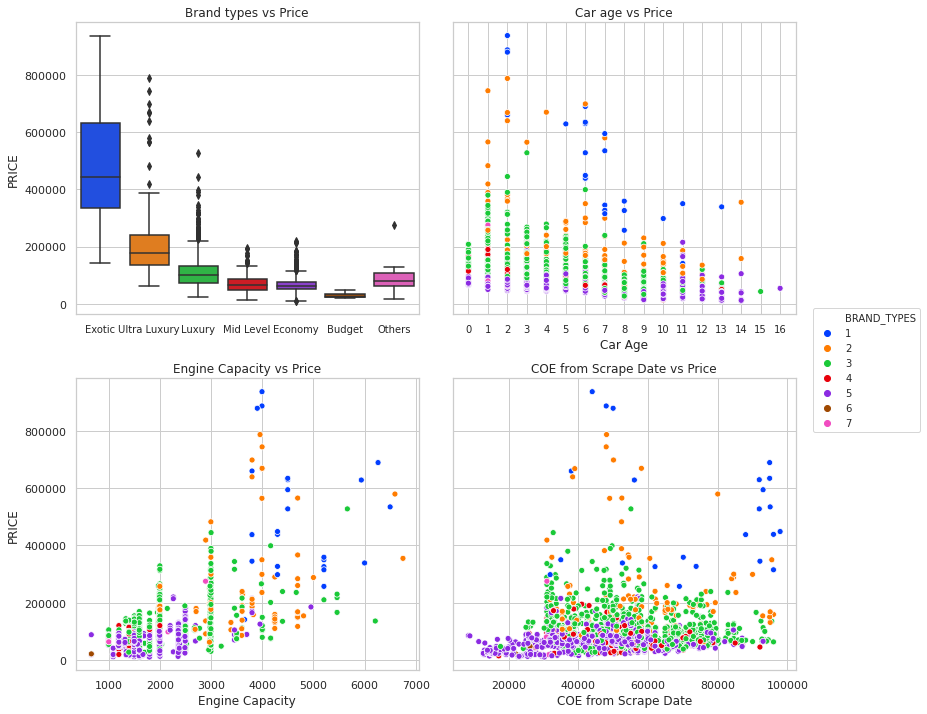

In [24]:
sns.set(style='whitegrid')

fig, axs = plt.subplots(2,2, figsize=(10, 6), sharey=True)

labels = ['Exotic', 'Ultra Luxury', 'Luxury', 'Mid Level', 'Economy', 'Budget','Others']

g = sns.boxplot(y='PRICE',x='BRAND_TYPES',data=sg_clean2, palette = 'bright',ax=axs[0,0])
g.set_xticklabels(['Exotic', 'Ultra Luxury', 'Luxury', 'Mid Level', 'Economy', 'Budget','Others'], size=10)
g.set(title='Brand types vs Price')
g.set(xlabel=None)


h = sns.scatterplot(data=sg_clean2, x='CAR_AGE', y='PRICE',hue='BRAND_TYPES',palette='bright',ax=axs[0,1],)
h.set_xticks(range(17))
h.set_xticklabels(['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16'], size=10)
h.set(title='Car age vs Price')
h.legend_.remove()
h.set(xlabel='Car Age')

a = sns.scatterplot(data=sg_clean2, x='ENGINE_CAPACITY_CC', y='PRICE',hue='BRAND_TYPES',palette='bright', ax=axs[1,0])
a.set(title='Engine Capacity vs Price')
a.legend_.remove()
a.set(xlabel='Engine Capacity')

b = sns.scatterplot(data=sg_clean2, x='COE_FROM_SCRAPE_DATE', y='PRICE',hue='BRAND_TYPES',palette='bright', ax=axs[1,1])
b.set(title='COE from Scrape Date vs Price')
b.set(xlabel='COE from Scrape Date')

#h,a.legend((1,2,3,4,5,6,7),('Exotic', 'Ultra Luxury', 'Luxury', 'Mid Level', 'Economy', 'Budget','Others'),loc='lower right')


fig.subplots_adjust(left=0, right=1, bottom=0, top=1.5, hspace=0.22, wspace=0.1)


#plt.legend(title='Brand Types', labels=labels, loc = 'upper right', bbox_to_anchor = (0, 0, 1.18, 0.85),
           #bbox_transform = plt.gcf().transFigure, fontsize = 10) 

plt.legend(loc = 'upper right', bbox_to_anchor = (0, 0, 1.18, 0.85),
           bbox_transform = plt.gcf().transFigure, fontsize = 10) 

          
#plt.suptitle("Title", y=1.65, fontsize=22) 

#fig.tight_layout()

plt.show()

### 3.1.2 Brand Types Dropped  

In [25]:
sg_clean3 = sg_brandtypes[['PRICE', 'DEPRE_VALUE_PER_YEAR', 'MILEAGE_KM',
       'COE_FROM_SCRAPE_DATE', 'DAYS_OF_COE_LEFT', 'REG_DATE',
       'MANUFACTURED_YEAR', 'CAR_AGE', 'DEREG_VALUE_FROM_SCRAPE_DATE', 'OMV',
       'ARF', 'ENGINE_CAPACITY_CC', 'ROAD_TAX_PER_YEAR', 'CURB_WEIGHT_KG',
       'TRANSMISSION']]

sg_clean3

,PRICE,DEPRE_VALUE_PER_YEAR,MILEAGE_KM,COE_FROM_SCRAPE_DATE,DAYS_OF_COE_LEFT,REG_DATE,MANUFACTURED_YEAR,CAR_AGE,DEREG_VALUE_FROM_SCRAPE_DATE,OMV,ARF,ENGINE_CAPACITY_CC,ROAD_TAX_PER_YEAR,CURB_WEIGHT_KG,TRANSMISSION
3,70800.0,16580.0,140800.0,75889.0,761.0,2011-12-05,2011,8.0,58899.0,71379.0,71379.0,2995,2380.0,2250.0,0
4,65800.0,6850.0,117000.0,39563.0,3503.0,2009-06-26,2009,10.0,38024.0,23465.0,23465.0,1797,974.0,1350.0,0
5,45000.0,18550.0,126000.0,41006.0,8.0,2010-09-21,2010,9.0,31818.0,56154.0,56154.0,1796,974.0,1650.0,0
7,70800.0,12680.0,41000.0,78810.0,1610.0,2014-04-23,2013,6.0,54685.0,32459.0,27443.0,1598,742.0,1405.0,0
9,89500.0,11910.0,57784.0,61103.0,2221.0,2015-11-25,2015,4.0,62640.0,29913.0,33879.0,1395,624.0,1480.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3981,103800.0,13470.0,19000.0,53694.0,2434.0,2016-07-18,2016,3.0,55704.0,27886.0,26041.0,1595,740.0,1430.0,0
3982,104500.0,16550.0,47638.0,84504.0,1679.0,2014-06-02,2014,5.0,78422.0,45977.0,56368.0,3456,3100.0,2030.0,0
3983,115000.0,15260.0,51500.0,67901.0,1950.0,2015-03-11,2012,7.0,85824.0,52051.0,65692.0,1796,974.0,1600.0,0
3984,119800.0,13150.0,16000.0,53300.0,2769.0,2017-06-07,2017,2.0,69888.0,33570.0,38998.0,1998,1210.0,1390.0,0


### 3.2 Pairplot 

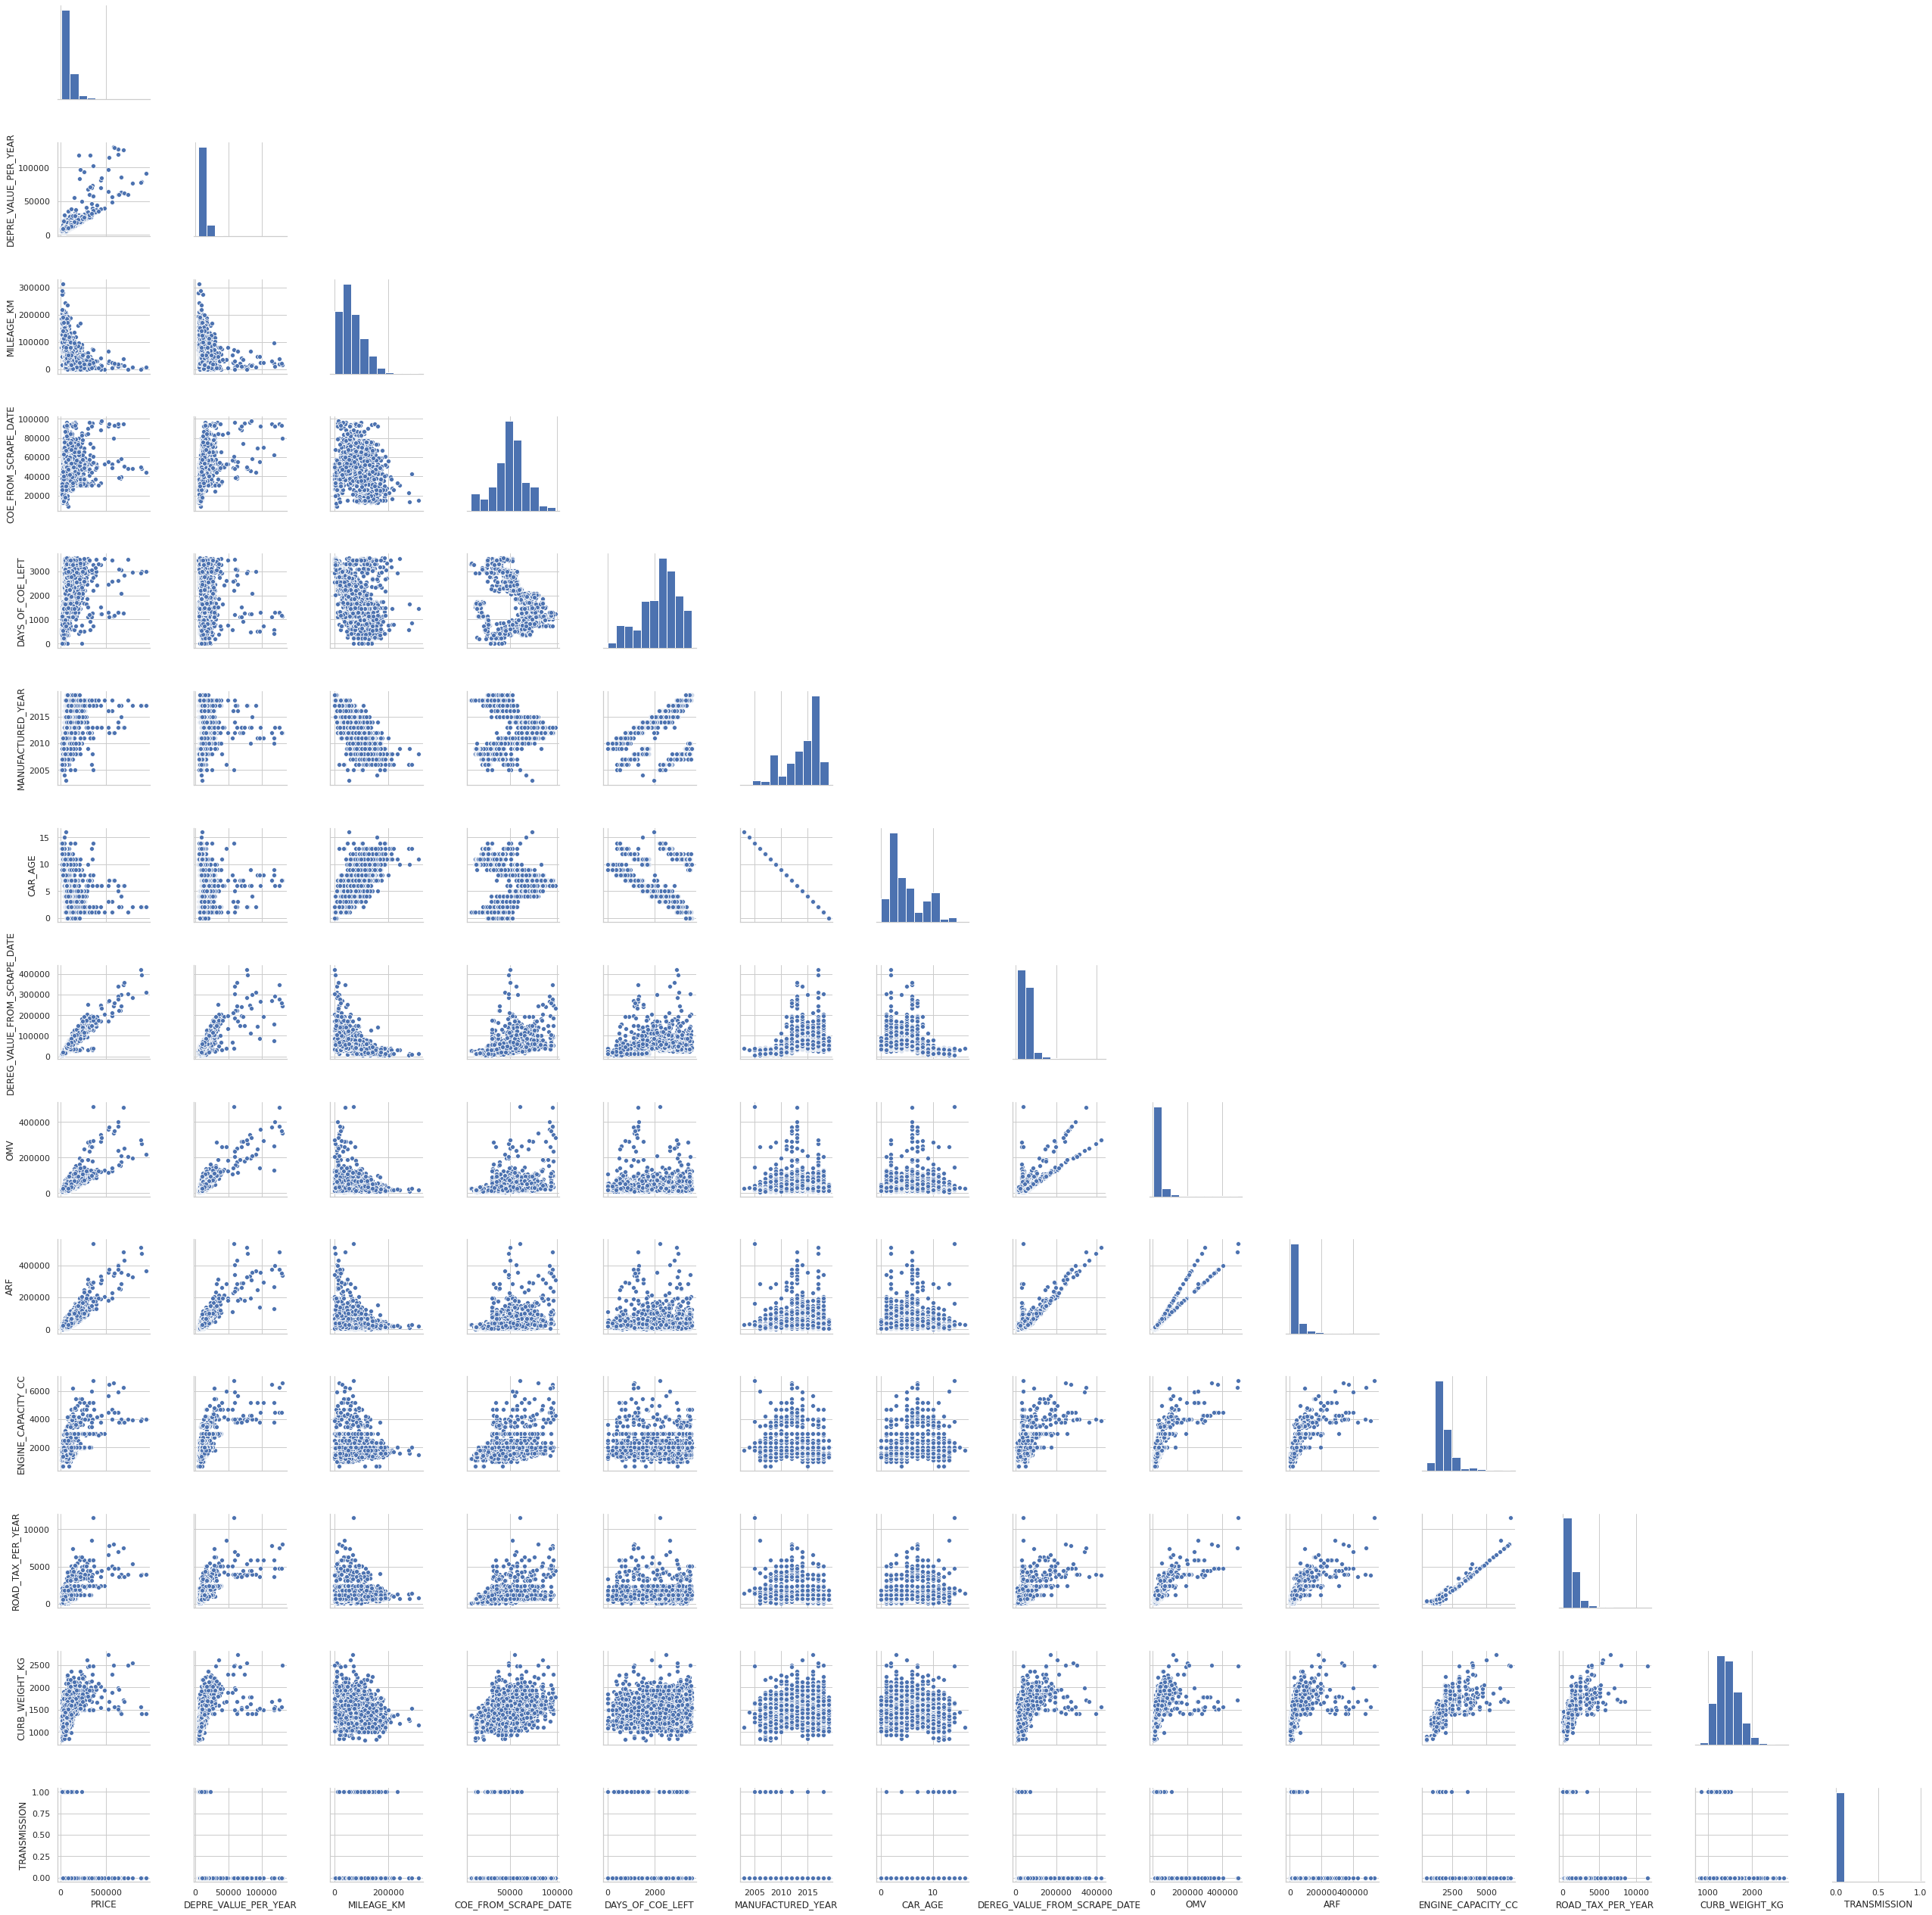

In [26]:
sns.pairplot(sg_clean3, corner=True)

### 3.3  Heatmap 

(14.5, -0.5)

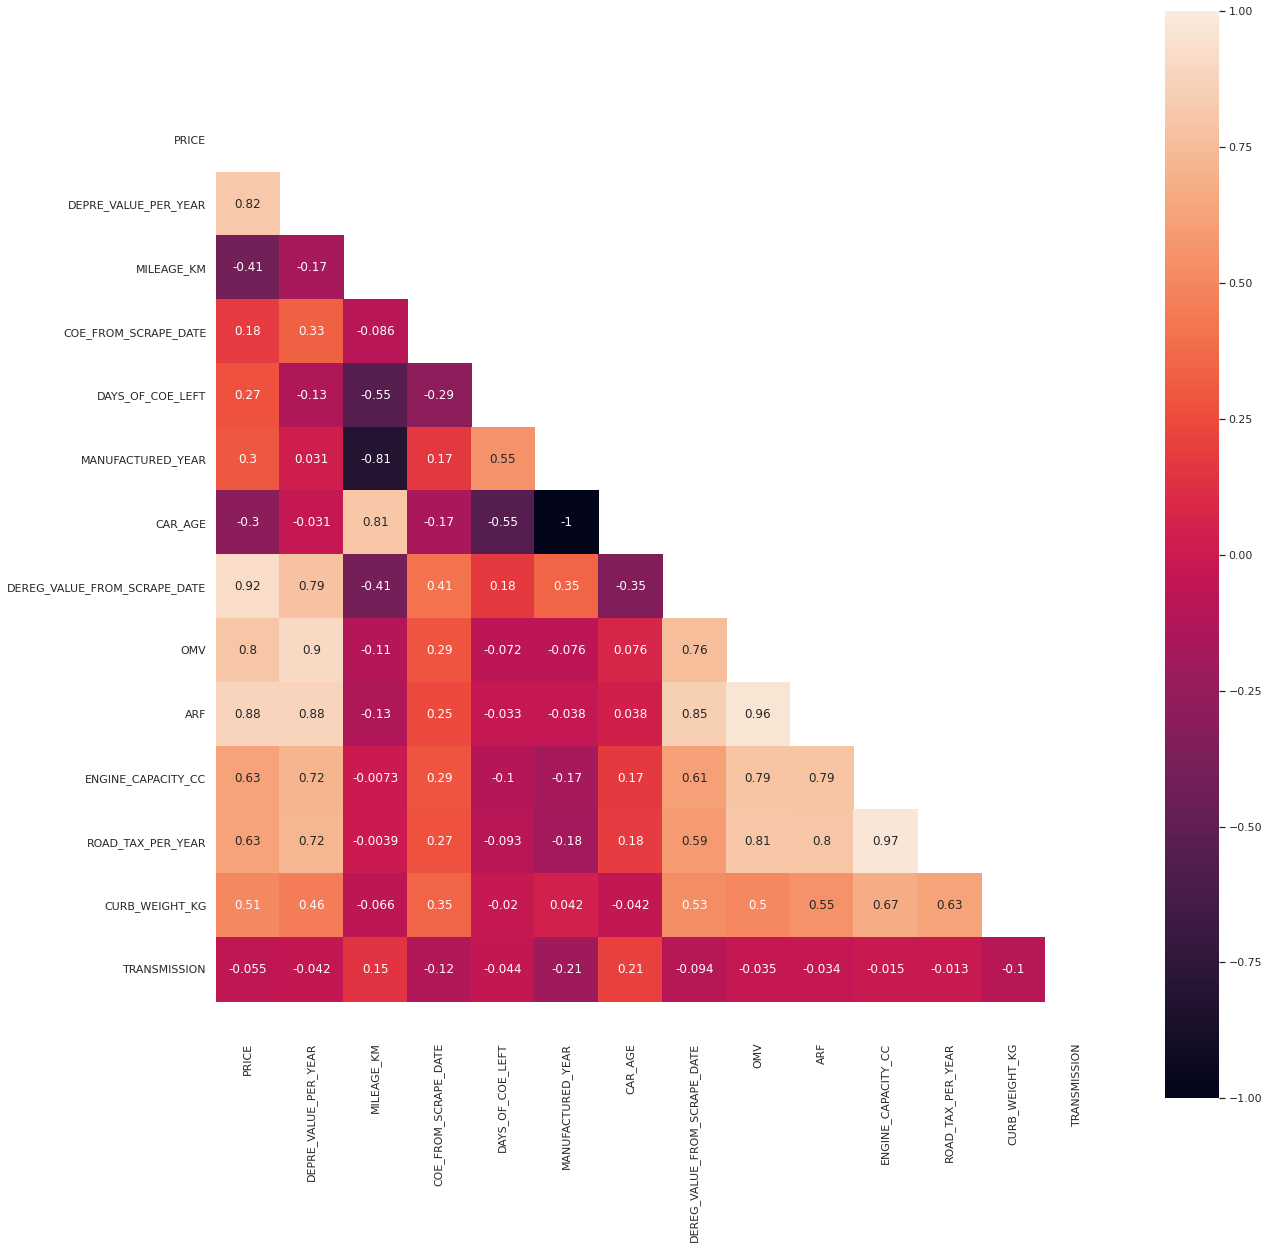

In [27]:
# Corr Matrix Heatmap Visualization

sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(sg_clean3.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure to control size of heatmap
fig, ax = plt.subplots(figsize=(20,20))

# Plot the heatmap
sns.heatmap(sg_clean3.corr(), mask=mask, annot=True, 
            square=True, vmin=-1, vmax=1,ax=ax);

# Prevent Heatmap Cut-Off Issue
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)


In [28]:
sg_clean3.corr()

,PRICE,DEPRE_VALUE_PER_YEAR,MILEAGE_KM,COE_FROM_SCRAPE_DATE,DAYS_OF_COE_LEFT,MANUFACTURED_YEAR,CAR_AGE,DEREG_VALUE_FROM_SCRAPE_DATE,OMV,ARF,ENGINE_CAPACITY_CC,ROAD_TAX_PER_YEAR,CURB_WEIGHT_KG,TRANSMISSION
PRICE,1.000000,0.816311,-0.409549,0.182676,0.274186,0.303260,-0.303260,0.924028,0.800307,0.878262,0.628530,0.625930,0.505817,-0.054826
DEPRE_VALUE_PER_YEAR,0.816311,1.000000,-0.174997,0.332542,-0.132094,0.030874,-0.030874,0.788938,0.904682,0.878519,0.715686,0.720155,0.460014,-0.042427
MILEAGE_KM,-0.409549,-0.174997,1.000000,-0.086450,-0.552581,-0.808519,0.808519,-0.406151,-0.112863,-0.134994,-0.007276,-0.003889,-0.066146,0.147215
COE_FROM_SCRAPE_DATE,0.182676,0.332542,-0.086450,1.000000,-0.286766,0.167054,-0.167054,0.413826,0.288024,0.248625,0.287635,0.273648,0.347914,-0.117565
DAYS_OF_COE_LEFT,0.274186,-0.132094,-0.552581,-0.286766,1.000000,0.554103,-0.554103,0.177352,-0.072364,-0.032655,-0.104450,-0.093057,-0.020114,-0.043732
MANUFACTURED_YEAR,0.303260,0.030874,-0.808519,0.167054,0.554103,1.000000,-1.000000,0.351045,-0.076031,-0.038358,-0.172967,-0.183103,0.041793,-0.209550
CAR_AGE,-0.303260,-0.030874,0.808519,-0.167054,-0.554103,-1.000000,1.000000,-0.351045,0.076031,0.038358,0.172967,0.183103,-0.041793,0.209550
DEREG_VALUE_FROM_SCRAPE_DATE,0.924028,0.788938,-0.406151,0.413826,0.177352,0.351045,-0.351045,1.000000,0.763166,0.848752,0.609691,0.591722,0.529732,-0.093880
OMV,0.800307,0.904682,-0.112863,0.288024,-0.072364,-0.076031,0.076031,0.763166,1.000000,0.962559,0.790138,0.810557,0.501080,-0.035455
ARF,0.878262,0.878519,-0.134994,0.248625,-0.032655,-0.038358,0.038358,0.848752,0.962559,1.000000,0.794299,0.799860,0.549470,-0.034407


### 3.3.1 Removing Features that are highly correlated to each other
From the above Corr Matrix, we can observe that a few Independent Variables are highly correlated with each other. 
Surprisingly, this makes sense because of the way some of the independent variables are computed. As a result, some of these features may be removed.
1. OMV and ARF: 
The Additional Registration Fee (ARF) is a tax levied upon car registration. It is based on a percentage of the vehicle's Open Market Value (OMV). According to the correlation matrix, they have a 0.96 correlation. So only one of them is needed and ARF will be removed from the dataset.


2. Engine CC and Road Tax: 
Road tax increases as engine CC increases. Including Road Tax would therefore introduce multicolinearity into the model, as both explain the same phenomenon. They correlate with one another 0.97 according to the correlation matrix. Therefore,  road tax will be removed.


3. Manufactured Year and Car Age: 
Manufactured year can be omitted as Car Age is determined by the year of manufacture. Furthermore, because car age is more intuitive, the Manufactured Year column will be removed. They have a correlation of -1 according to the correlation matrix.
 

4. Depreciation: 
Annual depreciation is the amount of money that the owner loses on the value of the vehicle each year, assuming that the vehicle is only deregistered at the end of its 10-year COE life-span. The formula for calculating the figure is as follows:
Depreciation = (List Price - Minimum PARF value)  ÷ years of COE remaining
The Open Market Value (OMV) or Additional Registration Fee (PARF) determines the minimum Preferential Additional Registration Fee (PARF) (ARF). Hence, the correlation between depreciation and OMV is 0.90. Depreciation will be removed.

### 3.4.1 OMV and ARF Relation Plot

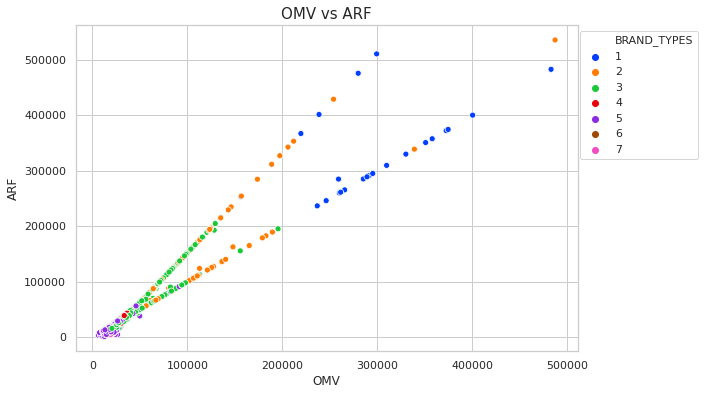

In [56]:
plt.figure(figsize=(9,6))

ax = sns.scatterplot(data=sg_clean2, x='OMV', y='ARF', hue='BRAND_TYPES', palette='bright')
plt.title('OMV vs ARF',fontsize=15)
plt.legend(bbox_to_anchor = (0, 0, 1.25, 1))

plt.show()

### 3.4.2 Engine Capacity and Road Tax Relation Plot

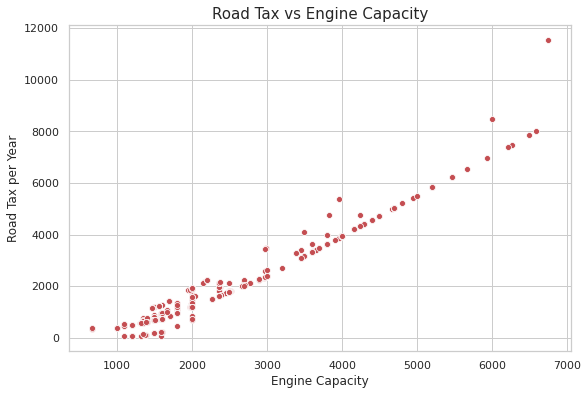

In [57]:
plt.figure(figsize=(9,6))

ax = sns.scatterplot(data=sg_clean2, x='ENGINE_CAPACITY_CC', y='ROAD_TAX_PER_YEAR',color='r')
ax.set(xlabel='Engine Capacity')
ax.set(ylabel='Road Tax per Year')
plt.title('Road Tax vs Engine Capacity',fontsize=15)
#plt.legend(bbox_to_anchor = (0, 0, 1.25, 1))

plt.show()

### 3.4.3 Car Age and Manufactured Year Relation Plot

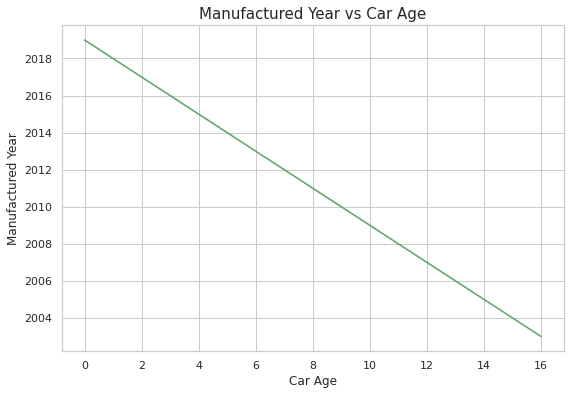

In [59]:
plt.figure(figsize=(9,6))

ax = sns.lineplot(data=sg_clean2, x='CAR_AGE', y='MANUFACTURED_YEAR', color='g')
ax.set(xlabel='Car Age')
ax.set(ylabel='Manufactured Year')
plt.title('Manufactured Year vs Car Age',fontsize=15)

plt.show()

### 3.4.4 Depreciaiton Value per Year and OMV Relation Plot

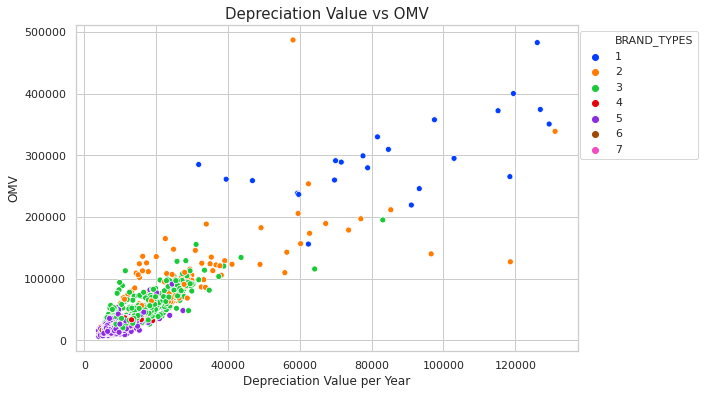

In [60]:
plt.figure(figsize=(9,6))

ax = sns.scatterplot(data=sg_clean2, x='DEPRE_VALUE_PER_YEAR', y='OMV',hue='BRAND_TYPES',palette='bright')
ax.set(xlabel='Depreciation Value per Year')
ax.set(ylabel='OMV')
plt.title('Depreciation Value vs OMV',fontsize=15)
plt.legend(bbox_to_anchor = (0, 0, 1.25, 1))

plt.show()

### 3.5 Dropping the Features based on our Reasons

In [29]:
sg_clean3.drop(['DEPRE_VALUE_PER_YEAR','REG_DATE','MANUFACTURED_YEAR',
                         'ARF','ROAD_TAX_PER_YEAR'],axis=1,inplace=True)
sg_clean3.columns


Index(['PRICE', 'MILEAGE_KM', 'COE_FROM_SCRAPE_DATE', 'DAYS_OF_COE_LEFT',
       'CAR_AGE', 'DEREG_VALUE_FROM_SCRAPE_DATE', 'OMV', 'ENGINE_CAPACITY_CC',
       'CURB_WEIGHT_KG', 'TRANSMISSION'],
      dtype='object')

### 3.5 Checking our new dataset again

In [30]:
sg_clean3.isna().sum()

PRICE                           0
MILEAGE_KM                      0
COE_FROM_SCRAPE_DATE            0
DAYS_OF_COE_LEFT                0
CAR_AGE                         0
DEREG_VALUE_FROM_SCRAPE_DATE    0
OMV                             0
ENGINE_CAPACITY_CC              0
CURB_WEIGHT_KG                  0
TRANSMISSION                    0
dtype: int64

In [31]:
sg_clean3.corr()['PRICE'].sort_values(ascending=False)

PRICE                           1.000000
DEREG_VALUE_FROM_SCRAPE_DATE    0.924028
OMV                             0.800307
ENGINE_CAPACITY_CC              0.628530
CURB_WEIGHT_KG                  0.505817
DAYS_OF_COE_LEFT                0.274186
COE_FROM_SCRAPE_DATE            0.182676
TRANSMISSION                   -0.054826
CAR_AGE                        -0.303260
MILEAGE_KM                     -0.409549
Name: PRICE, dtype: float64

In [32]:
sg_clean3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2593 entries, 3 to 3985
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PRICE                         2593 non-null   float64
 1   MILEAGE_KM                    2593 non-null   float64
 2   COE_FROM_SCRAPE_DATE          2593 non-null   float64
 3   DAYS_OF_COE_LEFT              2593 non-null   float64
 4   CAR_AGE                       2593 non-null   float64
 5   DEREG_VALUE_FROM_SCRAPE_DATE  2593 non-null   float64
 6   OMV                           2593 non-null   float64
 7   ENGINE_CAPACITY_CC            2593 non-null   int64  
 8   CURB_WEIGHT_KG                2593 non-null   float64
 9   TRANSMISSION                  2593 non-null   int64  
dtypes: float64(8), int64(2)
memory usage: 287.4 KB


## 4 Machine Learning Models

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression , Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from sklearn import preprocessing
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestRegressor
!pip install xgboost
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error 
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor 

You should consider upgrading via the '/opt/conda/bin/python3 -m pip install --upgrade pip' command.


## 4.0.1 Cross-Validation of models 

In [47]:
#Linear Regression
lm=LinearRegression()
folds = KFold(n_splits = 5, shuffle = True, random_state = 42)
scores = np.mean(cross_val_score(lm, x, y, scoring='r2', cv=folds))
print('CV score for Linear Regression:',scores) 

#Decision Tree Regressor 
dtr_cv= DecisionTreeRegressor()
folds = KFold(n_splits = 5, shuffle = True, random_state = 42)
scores = np.mean(cross_val_score(dtr_cv, x, y, scoring='r2', cv=folds))
print('CV score for Decision Tree Regressor:',scores) 

#RandomForestRegressor
rfr_cv= RandomForestRegressor()
folds = KFold(n_splits = 5, shuffle = True, random_state = 42)
scores = np.mean(cross_val_score(rfr_cv, x, y, scoring='r2', cv=folds))
print('CV score for Random Forest Regressor:',scores) 

#XGBoost
xgr_cv= xgb.XGBRegressor()
folds = KFold(n_splits = 5, shuffle = True, random_state = 42)
scores = np.mean(cross_val_score(xgr_cv, x, y, scoring='r2', cv=folds))
print('CV score for XGBoost:',scores) 

#KNN Regression
knn_cv= KNeighborsRegressor()
folds = KFold(n_splits = 5, shuffle = True, random_state = 42)
scores = np.mean(cross_val_score(knn_cv, x, y, scoring='r2', cv=folds))
print('CV Score for KNN Regression:',scores) 

CV score for Linear Regression: 0.9269979925069691
CV score for Decision Tree Regressor: 0.9115555614659299
CV score for Random Forest Regressor: 0.9574327148259837
CV score for XGBoost: 0.9609024802431911
CV Score for KNN Regression: 0.9434794961173845


## 4.1 Linear Regression  

In [48]:
#Linear Regression

x = sg_clean3[['MILEAGE_KM', 'COE_FROM_SCRAPE_DATE', 'DAYS_OF_COE_LEFT',
       'CAR_AGE', 'OMV', 'ENGINE_CAPACITY_CC', 'CURB_WEIGHT_KG',
       'TRANSMISSION','DEREG_VALUE_FROM_SCRAPE_DATE']].astype(float)

y = sg_clean3['PRICE'].astype(float)

#split data into 80% training set and 20% test set
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=42)

lm=LinearRegression()
lm.fit(x_train,y_train)

y_predicted = lm.predict(x_test)

rmse=np.sqrt(mean_squared_error(y_test, y_predicted))
r2 = r2_score(y_test, y_predicted)
mae = mean_absolute_error(y_test, y_predicted)

print('Root Mean Squared Error:',rmse)
print('Mean Absolute Error:',mae)
print('R2 Score:',r2)

Root Mean Squared Error: 16391.52575682653
Mean Absolute Error: 10647.97841904134
R2 Score: 0.9553515310558351


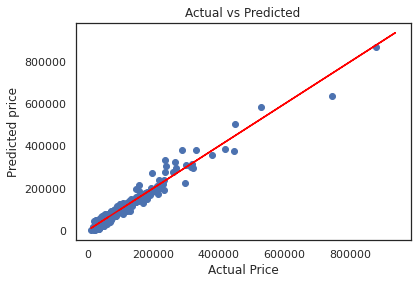

In [49]:
plt.scatter(y_test,y_predicted)
plt.plot(y_train,y_train, color='red')
plt.xlabel('Actual Price')
plt.ylabel('Predicted price')
plt.title('Actual vs Predicted')
plt.show()

In [50]:
lm_pred = pd.DataFrame({'Actual Value':y_test, 'Predicted Value':y_predicted, 'Difference':y_test-y_predicted})
lm_pred.sample(10)

,Actual Value,Predicted Value,Difference
2467,74000.0,78042.899183,-4042.899183
1623,91800.0,99702.917998,-7902.917998
1361,54800.0,51169.303233,3630.696767
712,55800.0,63345.221891,-7545.221891
3487,18000.0,-361.128692,18361.128692
1313,260800.0,277538.857395,-16738.857395
3921,123777.0,129963.050112,-6186.050112
1443,57388.0,30853.594955,26534.405045
493,39800.0,34885.604999,4914.395001
1563,78388.0,80915.241696,-2527.241696


## 4.2 Ridge Regression - Regularization

In [51]:
from sklearn.linear_model import Ridge


#split data into 80% training set and 20% test set
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=42)

# Model initialization
ridge = Ridge(alpha=0.5)    # set hyperparameter alpha to 0.5
# Fit the data(train the model)
ridge.fit(x_train, y_train)
# Predict
y_predicted = ridge.predict(x_test)

# model evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_predicted))
r2 = r2_score(y_test, y_predicted)
mae = mean_absolute_error(y_test, y_predicted)

# printing values
print('Slope:' ,ridge.coef_)
print()
print('Intercept:', ridge.intercept_)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Error:',mae)
print('R2 Score:', r2)

Slope: [-2.70382860e-02 -1.01029276e+00  6.46228135e+00 -1.37082463e+03
  5.75493272e-01  2.34326334e+00  1.26167978e+01  1.46352473e+04
  1.64296544e+00]

Intercept: 6237.1522491203505
Root Mean Squared Error: 16390.266384836974
Mean Absolute Error: 10646.477058889772
R2 Score: 0.9553583915362982


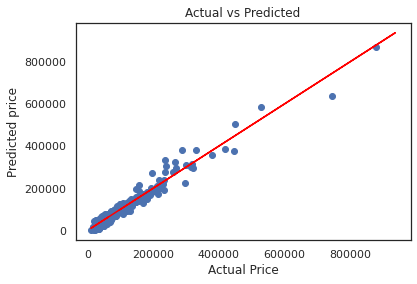

In [52]:
# plotting values
plt.scatter(y_test,y_predicted)
plt.plot(y_train,y_train, color='red')
plt.xlabel('Actual Price')
plt.ylabel('Predicted price')
plt.title('Actual vs Predicted')
plt.show()

### 4.2.1 RidgeCV to find the best alpha Value (Hyperparameter Tuning)

In [53]:
from sklearn.linear_model import LassoCV, RidgeCV

# hold out 20% of the data for final testing
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [54]:
# Use RidgeCV to find the optimal ALPHA value for L2 regularization

## Scale the data (a MUST if you're doing regularization)
std = StandardScaler()
std.fit(x_train.values)

# Scale the Predictors on both the train and validation set (for RidgeCV)
x_train_scaled = std.transform(x_train.values)
x_test_scaled = std.transform(x_test.values)

# Run the cross-validation, find the best alpha, refit the model on all the data with that alpha (RidgeCV does this for you)
alphavec = np.linspace(0, 1.0, 21) 
kf = KFold(n_splits=5, shuffle=True, random_state=42)

ridge_model = RidgeCV(alphas=alphavec, cv=kf)
ridge_model.fit(x_train_scaled, y_train)  # Fit your scaled train input and your y train values

# This is the best alpha value found
ridge_model.alpha_

1.0

In [55]:
def RMSE(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred)**2))

# Make predictions on the test set using the new model and save it into a variable
val_set_pred = ridge_model.predict(x_test_scaled)


# Find the MAE and R^2 on the test set using this model
print(f"Best Lambda (alpha) RidgeCV: {ridge_model.alpha_}")
print(f"RidgeCV RMSE: {RMSE(y_test, val_set_pred)}")
print(f"RidgeCV R^2 Score: {r2_score(y_test, val_set_pred)}")
print(mean_absolute_error(y_test, val_set_pred))

Best Lambda (alpha) RidgeCV: 1.0
RidgeCV RMSE: 16384.995057854365
RidgeCV R^2 Score: 0.9553871015851307
10646.303564087533


# 4.3 Lasso Regression - Regularization

In [56]:
from sklearn.linear_model import Lasso

#split data into 80% training set and 20% test set
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=42)

# Model initialization
lasso = Lasso(alpha=0.5)    # set hyperparameter alpha to 0.5
# Fit the data(train the model)
lasso.fit(x_train, y_train)
# Predict
y_predicted = lasso.predict(x_test)

# model evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_predicted))
r2 = r2_score(y_test, y_predicted)
mae = mean_absolute_error(y_test, y_predicted)

# printing values
print('Slope:' ,lasso.coef_)
print()
print('Intercept:', lasso.intercept_)
print('Root Mean Squared Error: ', rmse)
print('Mean Absolute Error:',mae)
print('R2 score: ', r2)

Slope: [-2.70549777e-02 -1.01022583e+00  6.46036013e+00 -1.37305380e+03
  5.75593980e-01  2.34057968e+00  1.26290561e+01  1.48559373e+04
  1.64286614e+00]

Intercept: 6235.937477092113
Root Mean Squared Error:  16391.3430273113
Mean Absolute Error: 10647.754122019474
R2 score:  0.9553525265150415


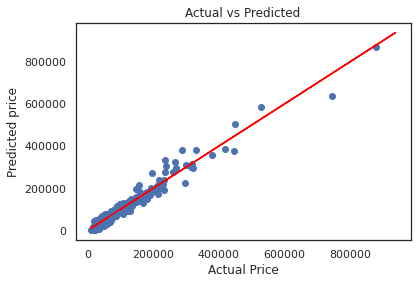

In [57]:
# plotting values
plt.scatter(y_test,y_predicted)
plt.plot(y_train,y_train, color='red')
plt.xlabel('Actual Price')
plt.ylabel('Predicted price')
plt.title('Actual vs Predicted')
plt.show()

### 4.3.1 LassoCV to find the best alpha Value (Hyperparameter Tuning)

In [58]:
# hold out 20% of the data for final testing
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [59]:
# Use LassoCV to find the optimal ALPHA value for L2 regularization

## Scale the data (a MUST if you're doing regularization)
std = StandardScaler()
std.fit(x_train.values)

# Scale the Predictors on both the train and validation set (for RidgeCV)
x_train_scaled = std.transform(x_train.values)
x_test_scaled = std.transform(x_test.values)

# Run the cross-validation, find the best alpha, refit the model on all the data with that alpha (RidgeCV does this for you)
alphavec = np.linspace(0.0, 1.0, 21) 
kf = KFold(n_splits=5, shuffle=True, random_state=42)

Lasso_model = LassoCV(alphas=alphavec, cv=kf)
Lasso_model.fit(x_train_scaled, y_train)  # Fit your scaled train input and your y train values

# This is the best alpha value found
Lasso_model.alpha_

0.0

In [60]:
def RMSE(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred)**2))

# Make predictions on the test set using the new model and save it into a variable
val_set_pred = Lasso_model.predict(x_test_scaled)


# Find the MAE and R^2 on the test set using this model
print(f"Best Lambda (alpha) RidgeCV: {Lasso_model.alpha_}")
print(f"RidgeCV RMSE: {RMSE(y_test, val_set_pred)}")
print(f"RidgeCV R^2 Score: {r2_score(y_test, val_set_pred)}")
print(mean_absolute_error(y_test, val_set_pred))

Best Lambda (alpha) RidgeCV: 0.0
RidgeCV RMSE: 16391.525756826893
RidgeCV R^2 Score: 0.9553515310558331
10647.978419042112


## 4.4 Decision Tree Regression 

In [61]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

In [62]:
#Decision Tree Regression

x = sg_clean3[['MILEAGE_KM', 'COE_FROM_SCRAPE_DATE', 'DAYS_OF_COE_LEFT',
       'CAR_AGE', 'OMV', 'ENGINE_CAPACITY_CC', 'CURB_WEIGHT_KG',
       'TRANSMISSION','DEREG_VALUE_FROM_SCRAPE_DATE']].astype(float)

y = sg_clean3['PRICE'].astype(float)

#Split data into 80% training set and 20% test set
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=42)

dtr = DecisionTreeRegressor(random_state=42)

# fit model
dtr.fit(x_train,y_train)

y_predicted = dtr.predict(x_test)

rmse=np.sqrt(mean_squared_error(y_test, y_predicted))
r2 = r2_score(y_test, y_predicted)
mae = mean_absolute_error(y_test, y_predicted)

print('Root Mean Squared Error:',rmse)
print('Mean Absolute Error:',mae)
print('R2 Score:',r2)

Root Mean Squared Error: 24885.97728078311
Mean Absolute Error: 10394.926782273604
R2 Score: 0.8970853478186618


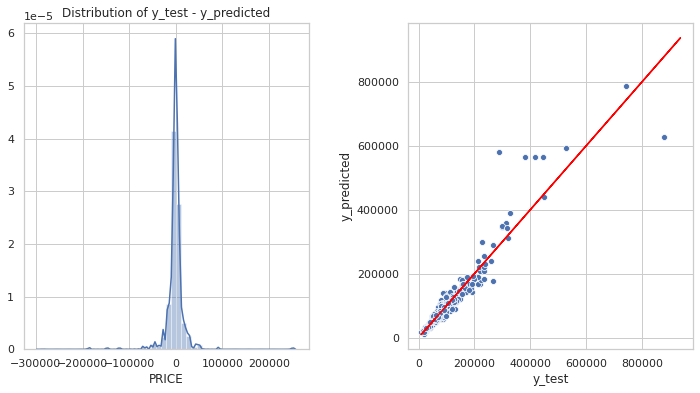

In [63]:
sns.set(style='whitegrid')

fig, axs = plt.subplots(1,2, figsize=(12, 6))

g = sns.distplot(y_test-y_predicted, ax=axs[0])
g.set(title='Distribution of y_test - y_predicted')
plt.plot(y_train,y_train, color='red')


h = sns.scatterplot(y_test, y_predicted)
h.set(xlabel='y_test')
h.set(ylabel='y_predicted')

fig.subplots_adjust(hspace=0.2, wspace=0.35)

plt.show()

## 4.4.2 Decision Tree Regressor - Hyperparameter Tuning (Get MAE)

In [64]:
def get_mae(max_leaf_nodes, x_train, x_test, y_train, y_test):
    dtr_tune = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=42)
    dtr_tune.fit(x_train, y_train)
    preds_test = dtr_tune.predict(x_test)
    mae = mean_absolute_error(y_test, preds_test)
    return(mae)

In [65]:
# compare MAE with differing values of max_leaf_nodes
for max_leaf_nodes in [5, 50, 250, 500, 5000, 10000]:
    my_mae = get_mae(max_leaf_nodes, x_train, x_test, y_train, y_test)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))

Max leaf nodes: 5  		 Mean Absolute Error:  22806
Max leaf nodes: 50  		 Mean Absolute Error:  11022
Max leaf nodes: 250  		 Mean Absolute Error:  9596
Max leaf nodes: 500  		 Mean Absolute Error:  9626
Max leaf nodes: 5000  		 Mean Absolute Error:  9812
Max leaf nodes: 10000  		 Mean Absolute Error:  9812


In [66]:
#After Tuning tree depth 

dtr_tune_500 = DecisionTreeRegressor(max_leaf_nodes=250, random_state=42)
dtr_tune_500.fit(x_train, y_train)
preds_test = dtr_tune_500.predict(x_test)

rmse=np.sqrt(mean_squared_error(y_test, preds_test))
r2 = r2_score(y_test, preds_test)
mae = mean_absolute_error(y_test, preds_test)

print('Root Mean Squared Error:',rmse)
print('Mean Absolute Error:',mae)
print('R2 Score:',r2)

Root Mean Squared Error: 21927.55719530572
Mean Absolute Error: 9596.492739471785
R2 Score: 0.9200997174758282


# 4.5 Random Forest Regressor 

In [67]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [68]:
#Random Forest Regressor

x = sg_clean3[['MILEAGE_KM', 'COE_FROM_SCRAPE_DATE', 'DAYS_OF_COE_LEFT',
       'CAR_AGE', 'OMV', 'ENGINE_CAPACITY_CC', 'CURB_WEIGHT_KG',
       'TRANSMISSION','DEREG_VALUE_FROM_SCRAPE_DATE']].astype(float)

y = sg_clean3['PRICE'].astype(float)

#Split data into 80% training set and 20% test set
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=42)


rfr = RandomForestRegressor(random_state=42)
rfr.fit(x_train, y_train)
rfr_predictions = rfr.predict(x_test)

rmse=np.sqrt(mean_squared_error(y_test, rfr_predictions))
r2 = r2_score(y_test, rfr_predictions)
mae = mean_absolute_error(y_test, rfr_predictions)

print('Root Mean Squared Error:',rmse)
print('Mean Absolute Error:',mae)
print('R2 Score:',r2)

Root Mean Squared Error: 14136.039739646343
Mean Absolute Error: 6901.744258188824
R2 Score: 0.9667934830347223


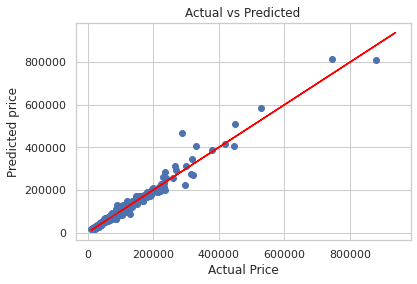

In [69]:
# plotting values
plt.scatter(y_test, rfr_predictions)
plt.plot(y_train,y_train, color='red')
plt.xlabel('Actual Price')
plt.ylabel('Predicted price')
plt.title('Actual vs Predicted')
plt.show()

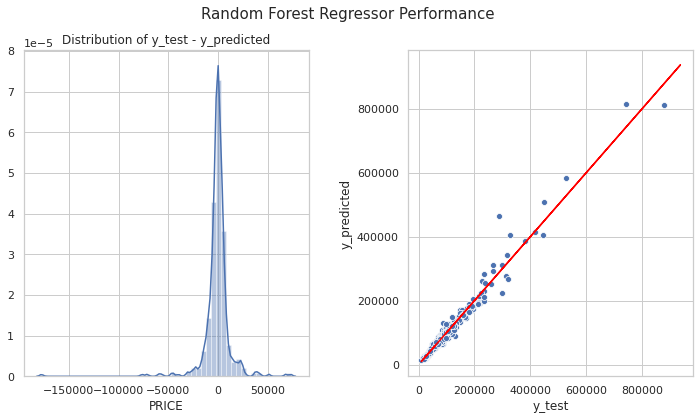

In [70]:
sns.set(style='whitegrid')

fig, axs = plt.subplots(1,2, figsize=(12, 6))

g = sns.distplot(y_test-rfr_predictions, ax=axs[0])
g.set(title='Distribution of y_test - y_predicted')
plt.plot(y_train,y_train, color='red')


h = sns.scatterplot(y_test,rfr_predictions)
h.set(xlabel='y_test')
h.set(ylabel='y_predicted')

fig.subplots_adjust(hspace=0.2, wspace=0.35)
plt.suptitle('Random Forest Regressor Performance',fontsize=15)

plt.show()

In [71]:
rfr_pred = pd.DataFrame({'Actual Value':y_test, 'Predicted Value':rfr_predictions, 'Difference':y_test-rfr_predictions})
rfr_pred.sample(10)

,Actual Value,Predicted Value,Difference
235,78500.0,79354.78,-854.78
2356,173800.0,167689.27,6110.73
3003,52800.0,55065.14,-2265.14
3233,78800.0,92046.19,-13246.19
372,61500.0,69646.33,-8146.33
2617,109800.0,109922.96,-122.96
1687,66800.0,66810.05,-10.05
891,444988.0,405437.67,39550.33
3189,36700.0,35607.14,1092.86
1947,73800.0,75961.34,-2161.34


## 4.5.1 Random Forest Regression - Hyperparameter Tuning

In [72]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2,4]
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [74]:
# Create the param grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid)

{'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72, 80], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [76]:
rfr_tuned = RandomForestRegressor()
rfr_grid=GridSearchCV(estimator=rfr_tuned,param_grid=param_grid,cv=5,verbose=3)
rfr_grid.fit(x_train,y_train)

Fitting 5 folds for each of 320 candidates, totalling 1600 fits
[CV] bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10, score=0.758, total=   0.0s
[CV] bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10, score=0.816, total=   0.0s
[CV] bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10, score=0.816, total=   0.0s
[CV] bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, m

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV]  bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=17, score=0.834, total=   0.0s
[CV] bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=17 
[CV]  bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=17, score=0.823, total=   0.0s
[CV] bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=17 
[CV]  bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=17, score=0.678, total=   0.0s
[CV] bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=17 
[CV]  bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=17, score=0.822, total=   0.0s
[CV] bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=25 


[Parallel(n_jobs=1)]: Done 1600 out of 1600 | elapsed:  2.7min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [78]:
rfr_grid.best_params_

{'bootstrap': True,
 'max_depth': 4,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 48}

In [79]:
rfr_best = rfr_grid.best_estimator_

rfr_best.fit(x_train,y_train)
pred_tuned=rfr_best.predict(x_test)

rmse=np.sqrt(mean_squared_error(y_test, pred_tuned))
r2 = r2_score(y_test, pred_tuned)
mae = mean_absolute_error(y_test, pred_tuned)

print('Root Mean Squared Error:',rmse)
print('Mean Absolute Error:',mae)
print('R2 Score:',r2)

Root Mean Squared Error: 19887.886906282765
Mean Absolute Error: 13299.435499222218
R2 Score: 0.9342728057920348


# 4.6 Xgboost Regression Model 

In [112]:
!pip install xgboost
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error 

     |████████████████████████████████| 255.9 MB 128.1 MB/s eta 0:00:01�██▊     | 213.9 MB 80.2 MB/s eta 0:00:01     |████████████████████████████████| 255.9 MB 19 kB/s 
You should consider upgrading via the '/opt/conda/bin/python3 -m pip install --upgrade pip' command.


In [113]:
#XGboost Regression model 


x = sg_clean3[['MILEAGE_KM', 'COE_FROM_SCRAPE_DATE', 'DAYS_OF_COE_LEFT',
       'CAR_AGE', 'OMV', 'ENGINE_CAPACITY_CC', 'CURB_WEIGHT_KG',
       'TRANSMISSION','DEREG_VALUE_FROM_SCRAPE_DATE']].astype(float)

y = sg_clean3['PRICE'].astype(float)

#Split data into 80% training set and 20% test set
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=42)

xgr=xgb.XGBRegressor() #Default 
xgr.fit(x_train,y_train)
pred=xgr.predict(x_test)

rmse=np.sqrt(mean_squared_error(y_test, pred))
r2 = r2_score(y_test, pred)
mae = mean_absolute_error(y_test, pred)

print('Root Mean Squared Error:',rmse)
print('Mean Absolute Error:',mae)
print('R2 Score:',r2)

Root Mean Squared Error: 12618.055440665728
Mean Absolute Error: 6256.845270351638
R2 Score: 0.9735422643754023


## 4.6.1 XGBoost - Hyperparameter Tuning

In [115]:
param={'n_estimators':[10,20,50,100,150,200],
      'max_depth':range(2,6),
      'eta':[0.01,0.1,0.15,0.2,0.25,0.3],
      'min_child_weight':[1, 2, 3]}

xgr_tune=xgb.XGBRegressor()
gs=GridSearchCV(estimator=xgr_tune,param_grid=param,cv=5,verbose=3)
gs.fit(x_train,y_train)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
[CV] eta=0.01, max_depth=2, min_child_weight=1, n_estimators=10 ......
[CV]  eta=0.01, max_depth=2, min_child_weight=1, n_estimators=10, score=-0.897, total=   0.1s
[CV] eta=0.01, max_depth=2, min_child_weight=1, n_estimators=10 ......
[CV]  eta=0.01, max_depth=2, min_child_weight=1, n_estimators=10, score=-0.998, total=   0.1s
[CV] eta=0.01, max_depth=2, min_child_weight=1, n_estimators=10 ......
[CV]  eta=0.01, max_depth=2, min_child_weight=1, n_estimators=10, score=-1.041, total=   0.0s
[CV] eta=0.01, max_depth=2, min_child_weight=1, n_estimators=10 ......


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV]  eta=0.01, max_depth=2, min_child_weight=1, n_estimators=10, score=-1.291, total=   0.0s
[CV] eta=0.01, max_depth=2, min_child_weight=1, n_estimators=10 ......
[CV]  eta=0.01, max_depth=2, min_child_weight=1, n_estimators=10, score=-1.049, total=   0.0s
[CV] eta=0.01, max_depth=2, min_child_weight=1, n_estimators=20 ......
[CV]  eta=0.01, max_depth=2, min_child_weight=1, n_estimators=20, score=-0.590, total=   0.1s
[CV] eta=0.01, max_depth=2, min_child_weight=1, n_estimators=20 ......
[CV]  eta=0.01, max_depth=2, min_child_weight=1, n_estimators=20, score=-0.685, total=   0.1s
[CV] eta=0.01, max_depth=2, min_child_weight=1, n_estimators=20 ......
[CV]  eta=0.01, max_depth=2, min_child_weight=1, n_estimators=20, score=-0.716, total=   0.1s
[CV] eta=0.01, max_depth=2, min_child_weight=1, n_estimators=20 ......
[CV]  eta=0.01, max_depth=2, min_child_weight=1, n_estimators=20, score=-0.953, total=   0.1s
[CV] eta=0.01, max_depth=2, min_child_weight=1, n_estimators=20 ......
[CV]  eta=

[Parallel(n_jobs=1)]: Done 2160 out of 2160 | elapsed:  9.0min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_...
                                    n_jobs=None, num_parallel_tree=None,
                                    objective='reg:squarederror',
                                    predictor=None, random_state=None,
                                    reg_alpha=None, ...),
             iid='deprec

In [116]:
print('Grid search best parameters:',gs.best_params_)
print('Grid search best score:',gs.best_score_)

Grid search best parameters: {'eta': 0.2, 'max_depth': 2, 'min_child_weight': 3, 'n_estimators': 200}
Grid search best score: 0.957051575884518


In [127]:
#After Hyperparameter Tuning

xgr_tuned=xgb.XGBRegressor(eta=0.2,max_depth=2,n_estimators=200,min_child_weight=3)
xgr_tuned.fit(x_train,y_train)
pred_tuned=xgr_tuned.predict(x_test)

rmse=np.sqrt(mean_squared_error(y_test, pred_tuned))
r2 = r2_score(y_test, pred_tuned)
mae = mean_absolute_error(y_test, pred_tuned)

print('Root Mean Squared Error:',rmse)
print('Mean Absolute Error:',mae)
print('R2 Score:',r2)

Root Mean Squared Error: 12973.071590308517
Mean Absolute Error: 7097.226037527095
R2 Score: 0.9720325133539797


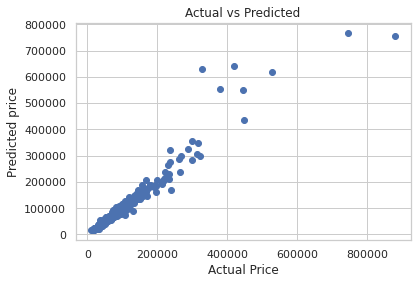

In [153]:
plt.scatter(y_test,pred_tuned)
plt.xlabel('Actual Price')
plt.ylabel('Predicted price')
plt.title('Actual vs Predicted')
plt.show()

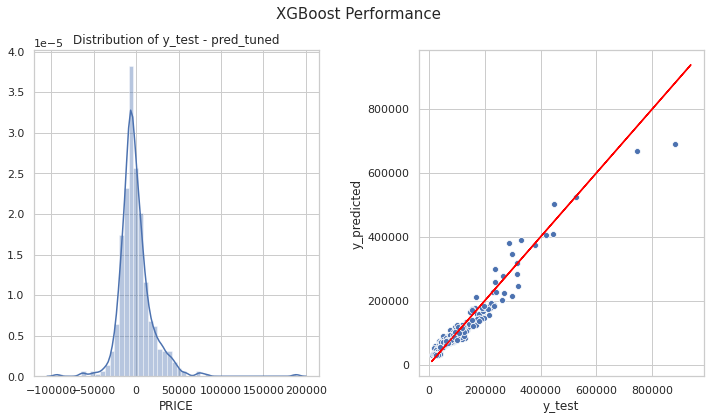

In [88]:
sns.set(style='whitegrid')

fig, axs = plt.subplots(1,2, figsize=(12, 6))

g = sns.distplot(y_test-pred_tuned, ax=axs[0])
g.set(title='Distribution of y_test - pred_tuned')
plt.plot(y_train,y_train, color='red')


h = sns.scatterplot(y_test,pred_tuned)
h.set(xlabel='y_test')
h.set(ylabel='y_predicted')

fig.subplots_adjust(hspace=0.2, wspace=0.35)
plt.suptitle('XGBoost Performance',fontsize=15)

plt.show()

In [155]:
xgr_pred = pd.DataFrame({'Actual Value':y_test, 'Predicted Value':pred_tuned, 'Difference':y_test-pred_tuned})
xgr_pred.sample(10)

,Actual Value,Predicted Value,Difference
2436,61800.0,59466.972656,2333.027344
1163,106668.0,106536.835938,131.164062
1858,125800.0,124046.687500,1753.312500
2316,67888.0,67606.062500,281.937500
1699,57800.0,62335.253906,-4535.253906
679,64800.0,64662.445312,137.554688
2219,195800.0,193905.765625,1894.234375
3403,92500.0,88767.867188,3732.132812
3047,217500.0,222801.921875,-5301.921875
192,190800.0,199559.109375,-8759.109375


# 4.7 KNN Regression

In [92]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor 

In [93]:
#KNN Regression

x = sg_clean3[['MILEAGE_KM', 'COE_FROM_SCRAPE_DATE', 'DAYS_OF_COE_LEFT',
       'CAR_AGE', 'OMV', 'ENGINE_CAPACITY_CC', 'CURB_WEIGHT_KG',
       'TRANSMISSION','DEREG_VALUE_FROM_SCRAPE_DATE']].astype(float)

y = sg_clean3['PRICE'].astype(float)

#Split data into 80% training set and 20% test set
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=42)


knn = KNeighborsRegressor(n_neighbors=5) #default n=5
knn.fit(x_train, y_train)
knn_predictions = knn.predict(x_test)

rmse=np.sqrt(mean_squared_error(y_test, knn_predictions))
r2 = r2_score(y_test, knn_predictions)
mae = mean_absolute_error(y_test, knn_predictions)

print('Root Mean Squared Error:',rmse)
print('Mean Absolute Error:',mae)
print('R2 Score:',r2)

Root Mean Squared Error: 13435.82638153814
Mean Absolute Error: 8305.283622350673
R2 Score: 0.9700017046658078


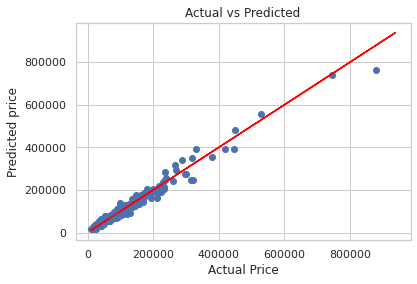

In [94]:
plt.scatter(y_test,knn_predictions)
plt.plot(y_train,y_train, color='red')
plt.xlabel('Actual Price')
plt.ylabel('Predicted price')
plt.title('Actual vs Predicted')
plt.show()

In [95]:
knn_pred = pd.DataFrame({'Actual Value':y_test, 'Predicted Value':knn_predictions, 'Difference':y_test-knn_predictions})
knn_pred.sample(10)

,Actual Value,Predicted Value,Difference
330,62000.0,68040.0,-6040.0
381,220000.0,199817.2,20182.8
245,119888.0,127930.8,-8042.8
3210,157800.0,135340.0,22460.0
462,88500.0,82817.6,5682.4
553,61800.0,64400.0,-2600.0
292,79800.0,87515.4,-7715.4
949,82988.0,70800.0,12188.0
2651,49800.0,51040.0,-1240.0
679,64800.0,63919.6,880.4


## KNN Regression - Hyperparameter Tuning  (GridSearch CV) 

In [96]:
n_neighbors = list(range(1,30))
 
#Convert to dictionary
hyperparameters = dict(n_neighbors=n_neighbors)
#Create new KNN object
knn_tune = KNeighborsRegressor()
#Use GridSearch
gs_knn = GridSearchCV(knn_tune, hyperparameters, cv=10)
#Fit the model
gs_knn.fit(x_train,y_train)



GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [97]:
#Find Optimal K 
print('Best n_neighbors:', gs_knn.best_estimator_.get_params()['n_neighbors'])


Best n_neighbors: 8


In [98]:
#With best n neighbours = 4, 
knn_tuned = KNeighborsRegressor(n_neighbors=8)
knn_tuned.fit(x_train, y_train)
knn_tuned_predictions = knn_tuned.predict(x_test)

rmse=np.sqrt(mean_squared_error(y_test, knn_tuned_predictions))
r2 = r2_score(y_test, knn_tuned_predictions)
mae = mean_absolute_error(y_test, knn_tuned_predictions)

print('Root Mean Squared Error:',rmse)
print('Mean Absolute Error:',mae)
print('R2 Score:',r2)

Root Mean Squared Error: 14499.61022491827
Mean Absolute Error: 8425.459537572255
R2 Score: 0.9650634138332781
